# **Course: Data Science for Decision Support**
**Assignment 1**

**Author:** MADHUMITHA, KESAVAN: 537467

**Classification**

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sb
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from scipy.stats import chi2_contingency
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score



1)	`Read the data from your individual variant into Python notebook`

In [163]:
df= pd.read_csv("HR_comma_sep.csv")

 2) `Output the main information (number of variables, number of instances).` 

In [166]:
print("number of variables",df.size, "\nnumber of instances", len(df.columns))

number of variables 149990 
number of instances 10


number of variables 149990  
number of instances 10

3) `Output several first rows of the dataset. `

In [170]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

4) `Make explanatory data analyses for each variable (mean, std, etc.).`

In [173]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Summary Statistics

| Metric                  | satisfaction_level | last_evaluation | number_project | average_montly_hours | time_spend_company | Work_accident | left   | promotion_last_5years |
|-------------------------|--------------------|-----------------|----------------|-----------------------|--------------------|---------------|--------|-----------------------|
| **Count**               | 14999.000000      | 14999.000000    | 14999.000000   | 14999.000000          | 14999.000000       | 14999.000000  | 14999.000000 | 14999.000000          |
| **Mean**                | 0.612834          | 0.716102        | 3.803054       | 201.050337            | 3.498233           | 0.144610      | 0.238083 | 0.021268              |
| **Standard Deviation**  | 0.248631          | 0.171169        | 1.232592       | 49.943099             | 1.460136           | 0.351719      | 0.425924 | 0.144281              |
| **Minimum**             | 0.090000          | 0.360000        | 2.000000       | 96.000000             | 2.000000           | 0.000000      | 0.000000 | 0.000000              |
| **25th Percentile**     | 0.440000          | 0.560000        | 3.000000       | 156.000000            | 3.000000           | 0.000000      | 0.000000 | 0.000000              |
| **Median (50%)**        | 0.640000          | 0.720000        | 4.000000       | 200.000000            | 3.000000           | 0.000000      | 0.000000 | 0.000000              |
| **75th Percentile**     | 0.820000          | 0.870000        | 5.000000       | 245.000000            | 4.000000           | 0.000000      | 0.000000 | 0.000000              |
| **Maximum**             | 1.000000          | 1.000000        | 7.000000       | 310.000000            | 10.000000          | 1.000000      | 1.000000 | 1.000000              |


5) `Look at the independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices.`

In [177]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [179]:
# X (independent variables) and Y (dependent variable)
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
          'time_spend_company', 'Work_accident', 'promotion_last_5years','Department','salary']]
Y = df['left']

# shapes of X and Y
print("Shape of X (Independent Variables):", X.shape)
print("Shape of Y (Dependent Variable):", Y.shape)

Shape of X (Independent Variables): (14999, 9)
Shape of Y (Dependent Variable): (14999,)


"Left" is a dependent variable other columns are independent variables.

Shape of X is (14999, 9).

Shape of Y is (14999,).

6) `Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.`

In [183]:
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years Department  salary  
0                   3              0                      0      sales     low  
1                   6              0                      0      sales  medium  
2                   4              0                      0      sales  medium  
3                   5              0                      0      sales     low  
4                   3              0                      0      sales     low

In [185]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [186]:
# X = X.drop(columns = "id") There is no column as id to be remove

In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [191]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14999 entries, 0 to 14998
Series name: left
Non-Null Count  Dtype
--------------  -----
14999 non-null  int64
dtypes: int64(1)
memory usage: 117.3 KB


In [193]:
null_count = df.isnull().sum()
print(null_count)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [195]:
unique_departments = df['Department'].unique()
print("Unique Departments:", unique_departments)

Unique Departments: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [197]:
unique_salaries = df['salary'].unique()
print("Unique Salaries:", unique_salaries)

Unique Salaries: ['low' 'medium' 'high']


In [199]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'satisfaction_level': [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
Unique values in 'last_evaluation': [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
Unique values in 'number_project': [2 5 7 6 4 3]
Unique values in 'average_montly_hours': [157 262 272 223 159 153 247 259 224 142 

1) All the columns in X datasets are Float64 and object.
2) The Datatype of the column in Y dataset is int64.
3) In X datasets, the columns number_project, time_spend_company, work_accident, promotion_last_year, Department, salary are catagorical variables and has no null values.
4) Y datasets have no null values but categorical variables.
5) I have no column to be removed, so the X.shape is same.

7) `Are there any Nan values? Try different filling of them (mean, median).`

Both X and Y has no columns with NAN values.

8) `Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.`

In [205]:
# Selecting numeric variables only

In [207]:
num_vars = df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

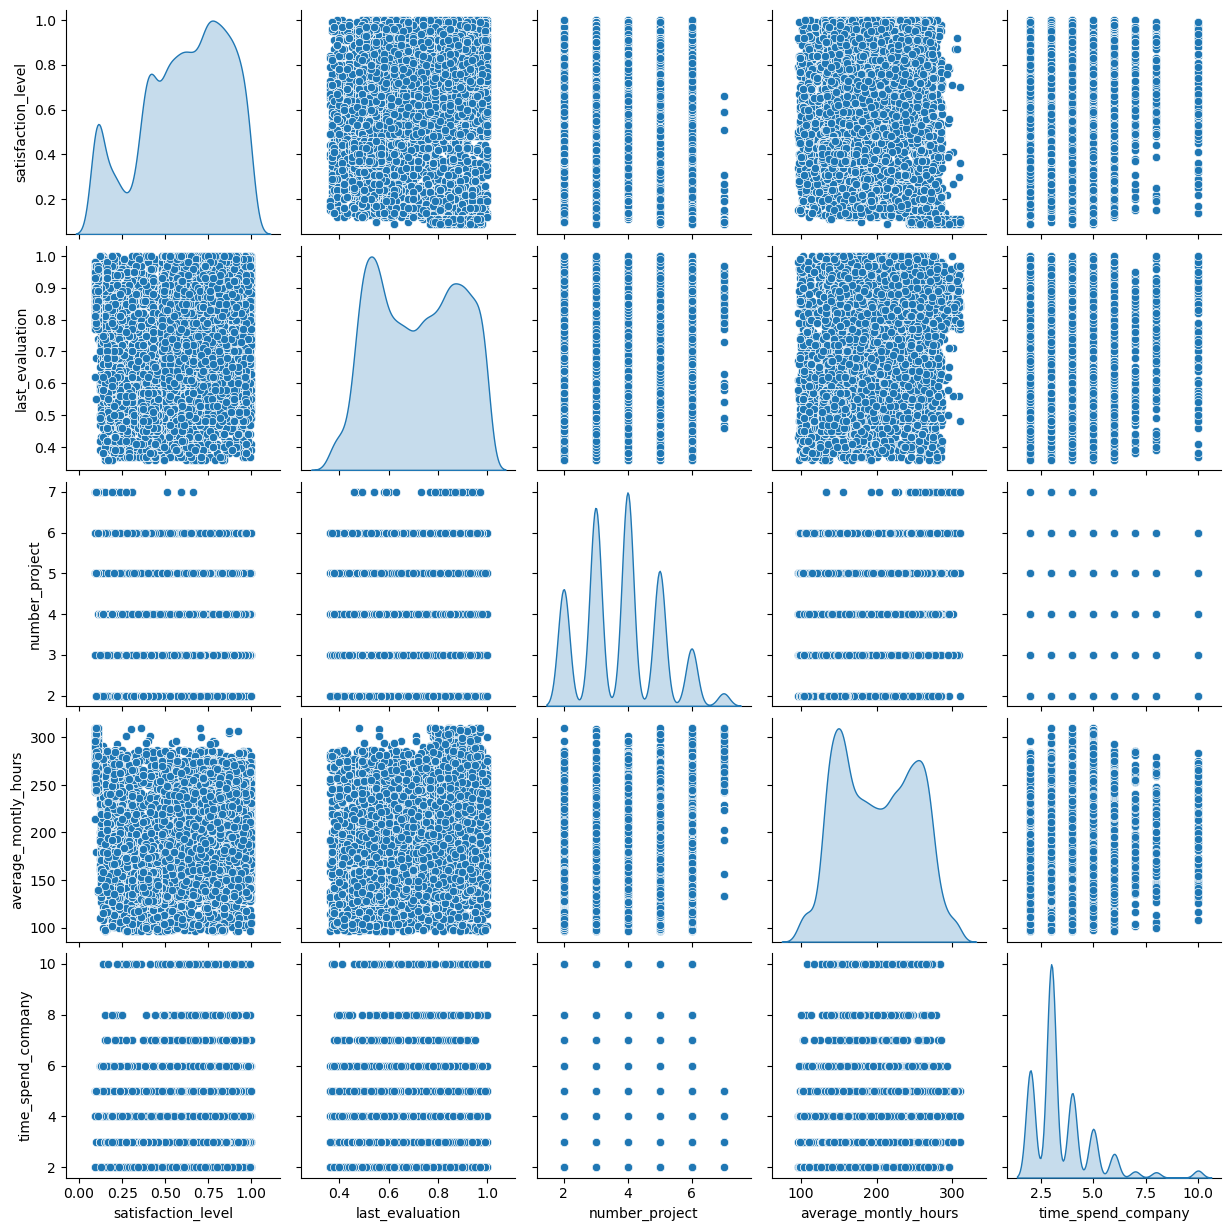

In [209]:
# Use a valid style or the default if seaborn-whitegrid is not available
plt.style.use('seaborn-whitegrid' if 'seaborn-whitegrid' in plt.style.available else 'default')

# Plotting the pairplot
sb.pairplot(num_vars, diag_kind='kde')
plt.show()

In [210]:
# Calculate the correlation matrix
corr_matrix = num_vars.corr()
print(corr_matrix)

                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000  


1) This suggests that employees with higher performance evaluations tend to have higher satisfaction levels.
2) This might indicate that a higher number of projects can lead to decreased satisfaction.
3) Weak Negative Correlation with Average Monthly Hours and Time Spent in Company: This suggests that these factors might have a slight negative impact on satisfaction.
4) Positive Correlation with Number of Projects and Average Monthly Hours: This implies that employees with higher evaluations might be assigned more projects and work longer hours.
5) Positive Correlation with Average Monthly Hours: This suggests that more projects often lead to increased working hours.
6) Weak Positive Correlation with Time Spent in Company: This might indicate that more experienced employees tend to work longer hours.

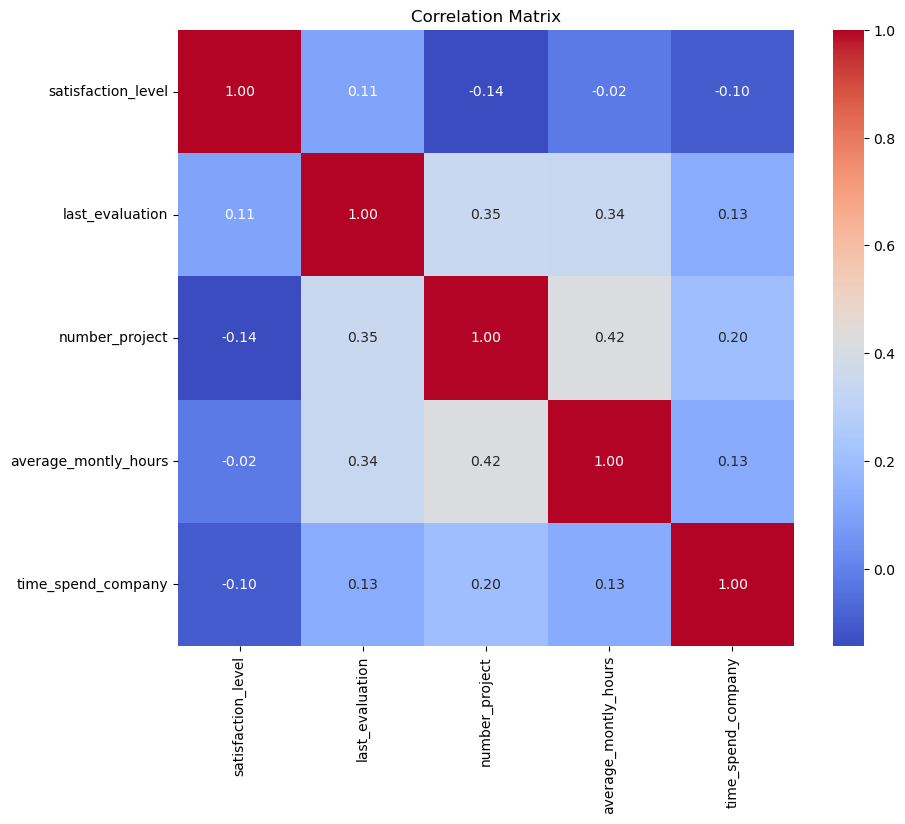

<Figure size 640x480 with 0 Axes>

In [212]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))  
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()
# Save the heatmap as an image
plt.savefig('heatmap.png')  # Save as PNG

### Correlation Matrix Analysis

| Variable | satisfaction_level | last_evaluation | number_project | average_montly_hours | time_spend_company |
|---|---|---|---|---|---|
| satisfaction_level | 1.000000 | 0.105021 | -0.142970 | -0.020048 | -0.100866 |
| last_evaluation | 0.105021 | 1.000000 | 0.349333 | 0.339742 | 0.131591 |
| number_project | -0.142970 | 0.349333 | 1.000000 | 0.417211 | 0.196786 |
| average_montly_hours | -0.020048 | 0.339742 | 0.417211 | 1.000000 | 0.127755 |
| time_spend_company | -0.100866 | 0.131591 | 0.196786 | 0.127755 | 1.000000 |


* **Positive Correlations:**
  - `last_evaluation` and `number_project`: Employees with higher evaluations tend to be assigned more projects.
  - `number_project` and `average_montly_hours`: More projects often lead to longer working hours.
* **Negative Correlations:**
  - `satisfaction_level` and `number_project`: A high number of projects might negatively impact satisfaction.


9) `Build 2D plots of dependences between each pair of the varibles.`

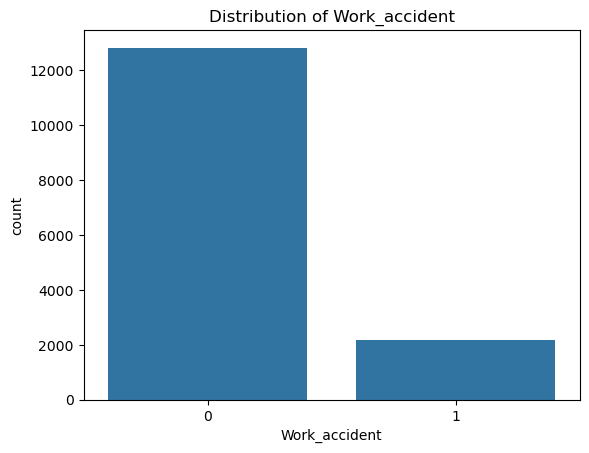

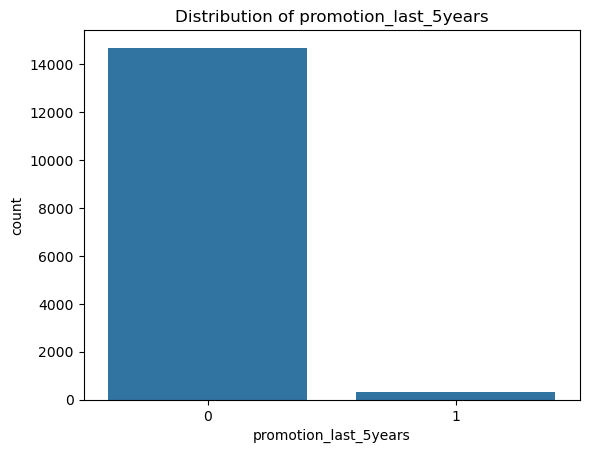

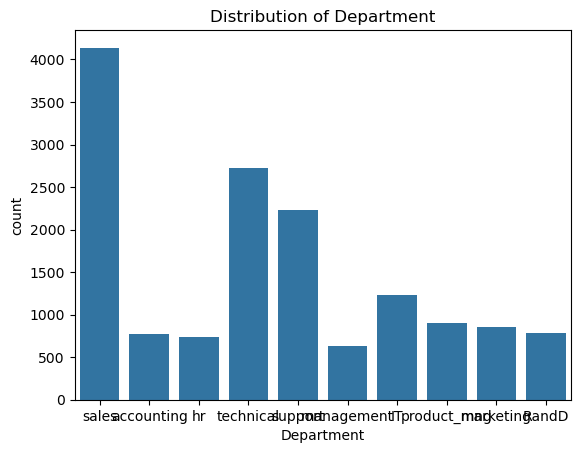

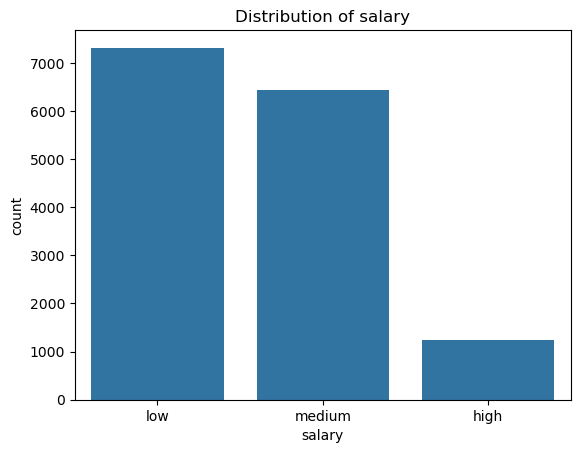

In [215]:
categorical_cols = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']

# Count plots for all categorical variables
for col in categorical_cols:
  sb.countplot(x=col, data=df)
  plt.title(f'Distribution of {col}')
  plt.show()

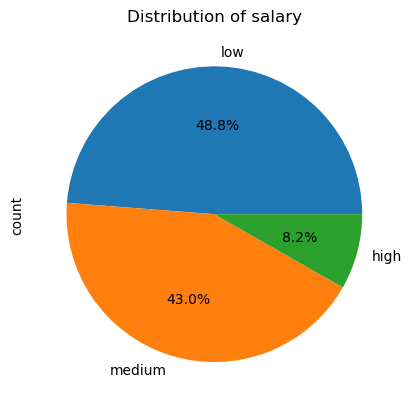

In [216]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.show()

Relationship between Work_accident and promotion_last_5years:
There is a significant association.


Relationship between Work_accident and Department:
There is a significant association.


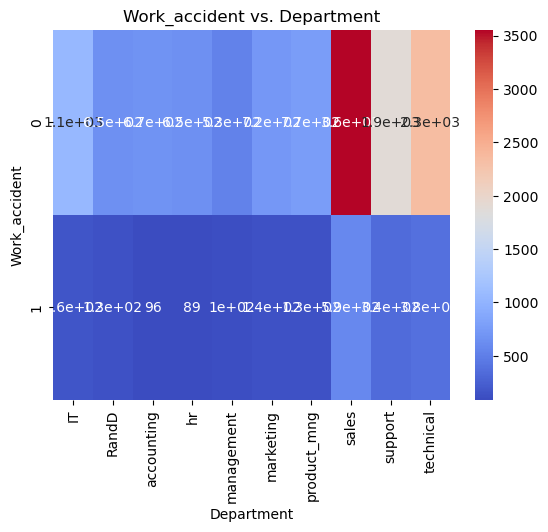

Relationship between Work_accident and salary:
There is no significant association.


Relationship between promotion_last_5years and Department:
There is a significant association.


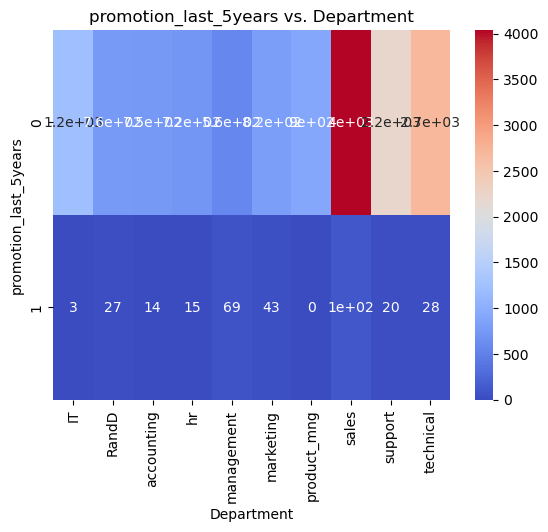

Relationship between promotion_last_5years and salary:
There is a significant association.


Relationship between Department and salary:
There is a significant association.


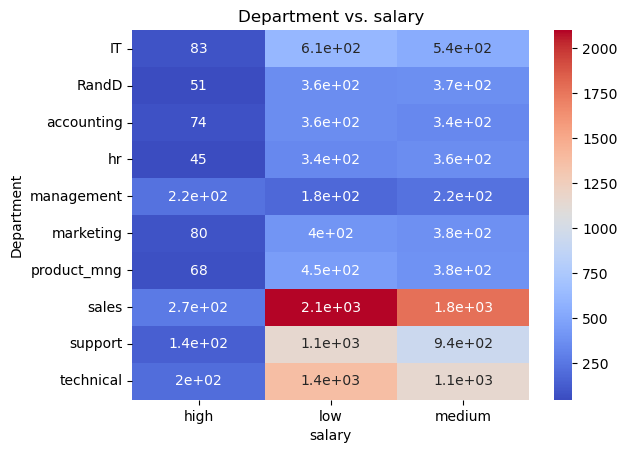

In [217]:
categorical_cols = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']

# Iterate through pairs of categorical variables
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        var1 = categorical_cols[i]
        var2 = categorical_cols[j]

        # Create a contingency table
        contingency_table = pd.crosstab(df[var1], df[var2])

        # Perform the Chi-square test
        chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

        # Print the results
        print(f"Relationship between {var1} and {var2}:")
        if p_value < 0.05:
            print("There is a significant association.")
        else:
            print("There is no significant association.")

        # Visualize the contingency table
        sb.heatmap(contingency_table, annot=True, cmap='coolwarm')
        plt.title(f"{var1} vs. {var2}")
        plt.show()

1) Relationship between Work_accident among Department and promotion_last_5years. There is a significant association.
2) Relationship between promotion_last_5years among Department and salary. There is a significant association.
3) Relationship between Department and salary. There is a significant association.

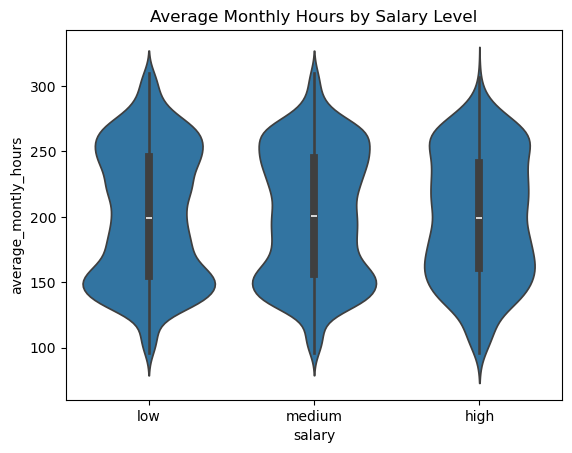

In [219]:
# Box plot of satisfaction level by Department
sb.boxplot(x='Department', y='satisfaction_level', data=df)
plt.title('Satisfaction Level by Department')
plt.show()

# Violin plot of average monthly hours by salary level
sb.violinplot(x='salary', y='average_montly_hours', data=df)
plt.title('Average Monthly Hours by Salary Level')
plt.show()

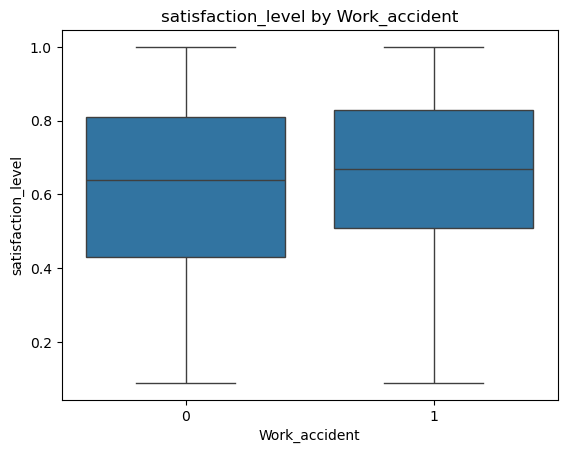

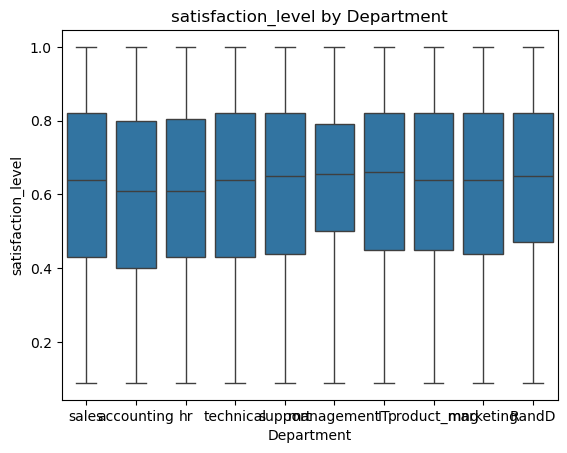

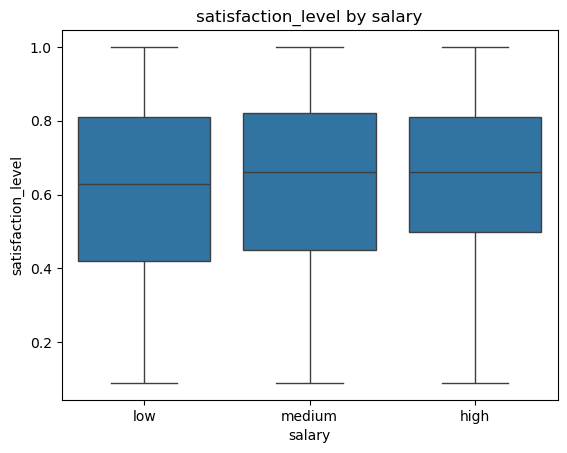

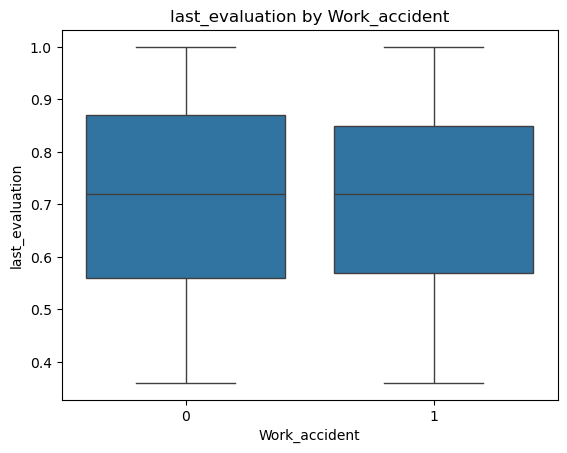

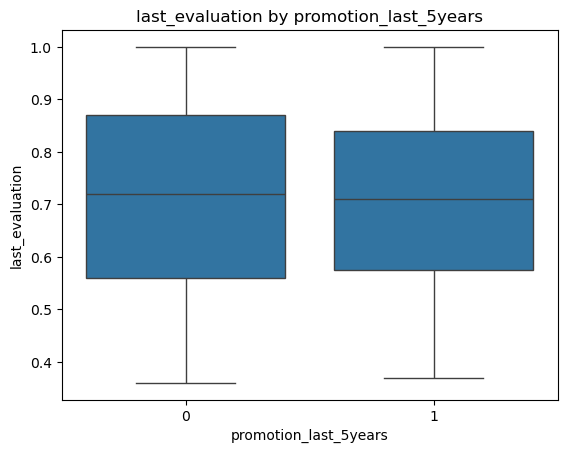

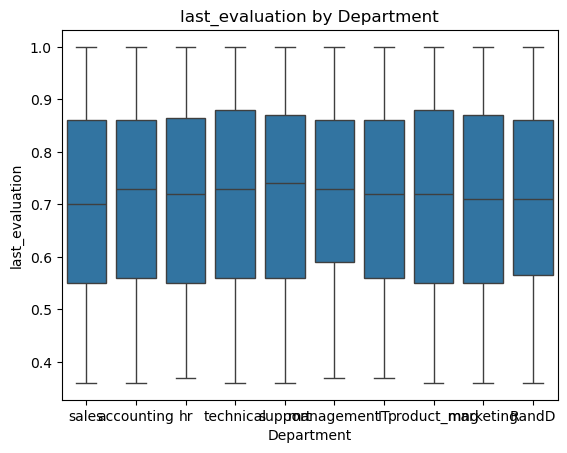

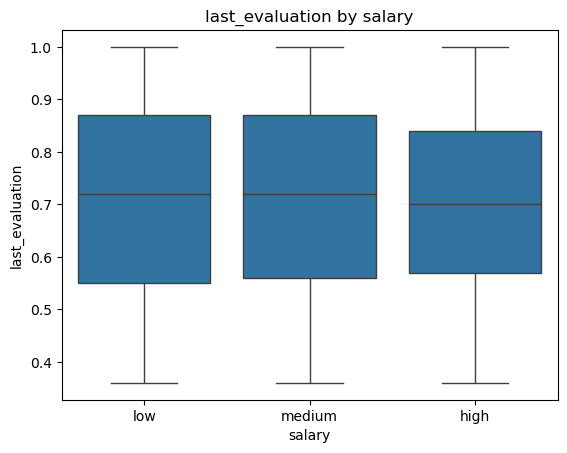

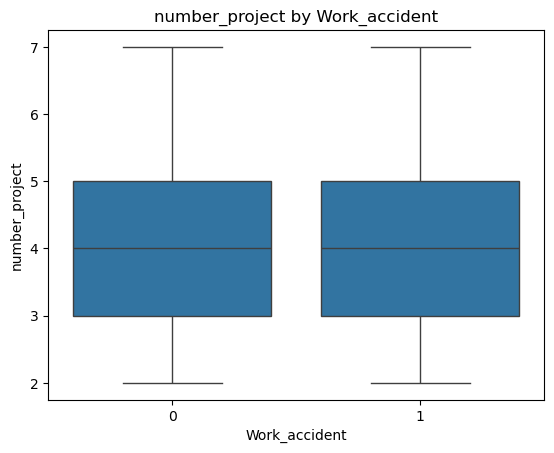

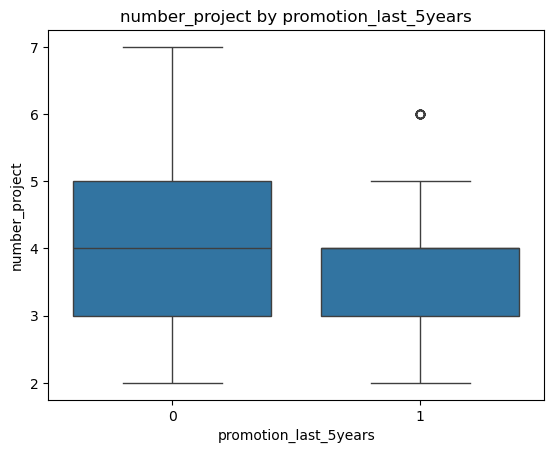

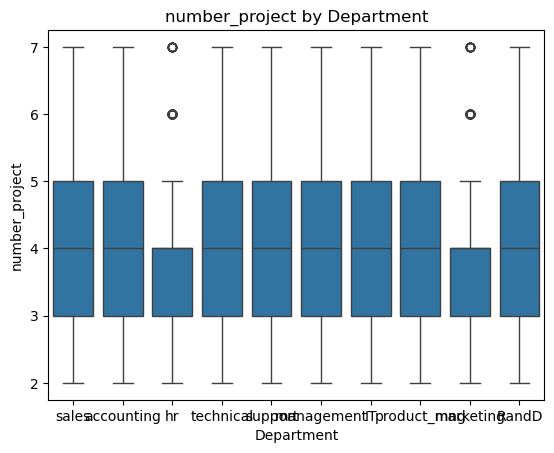

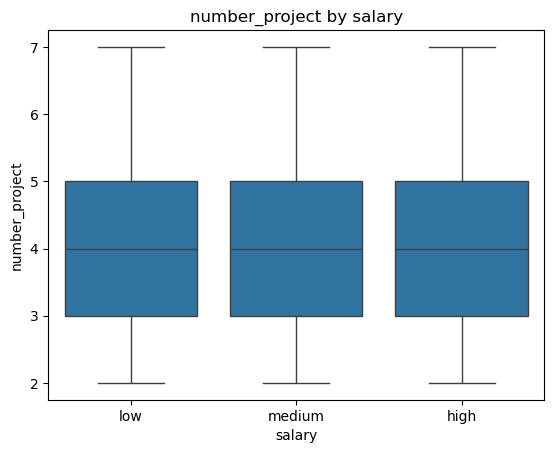

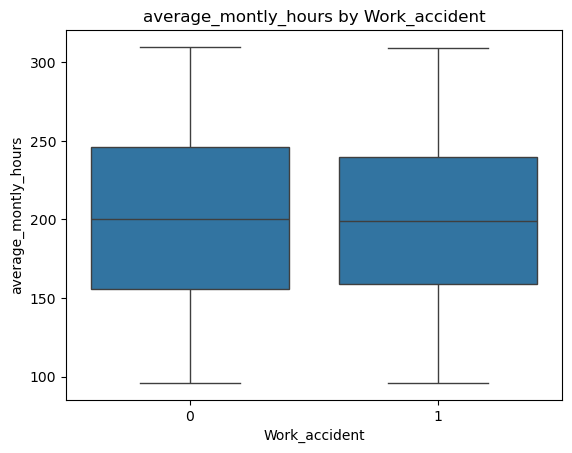

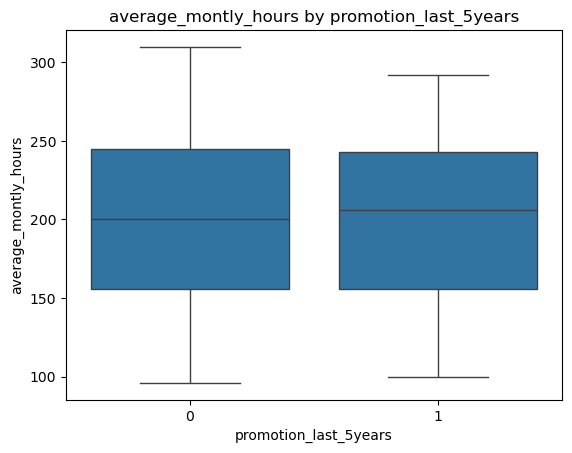

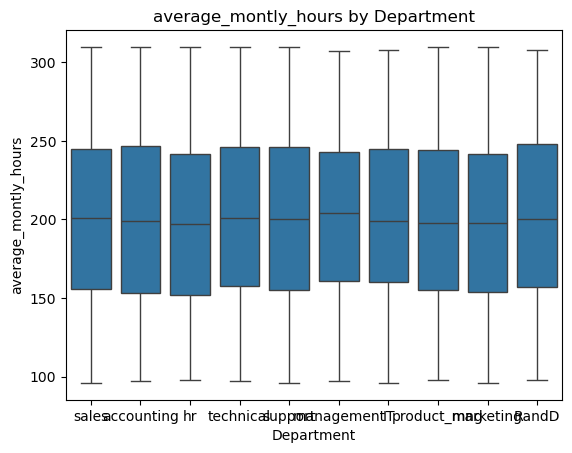

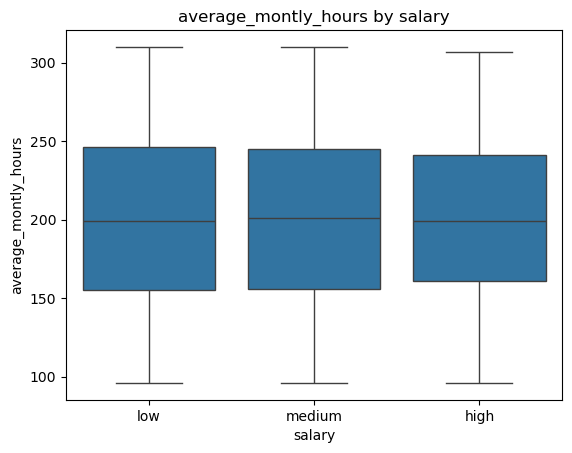

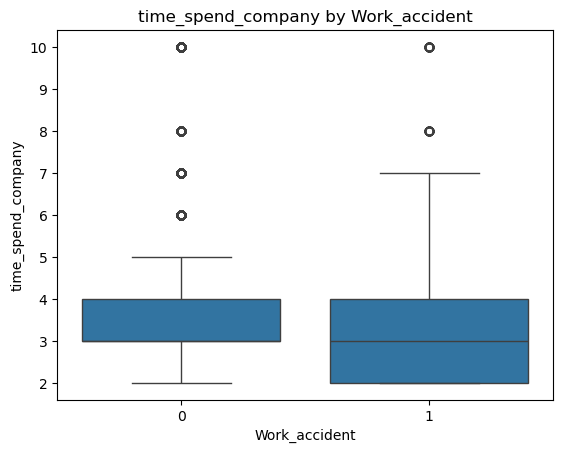

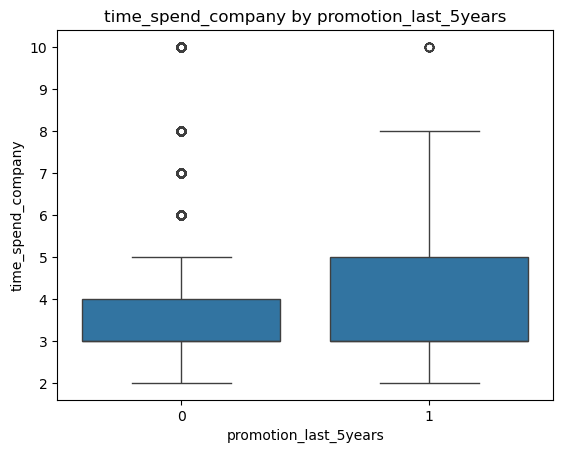

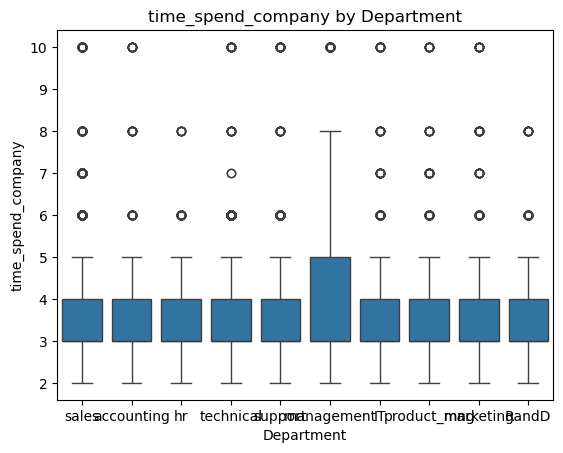

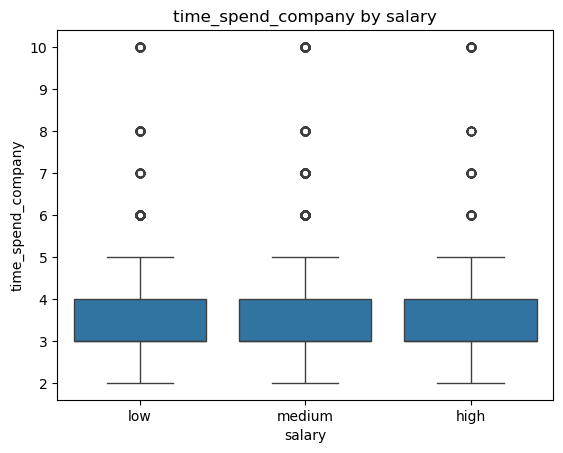

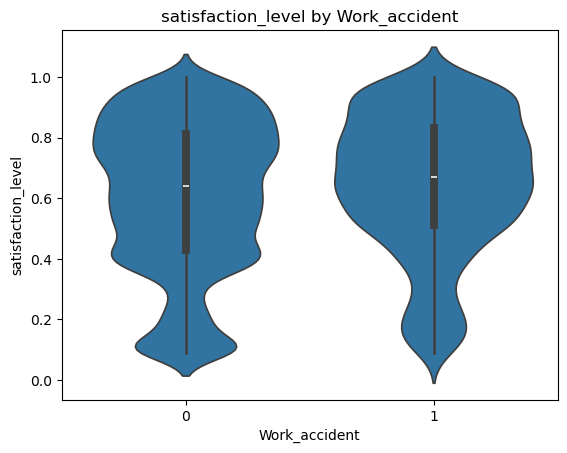

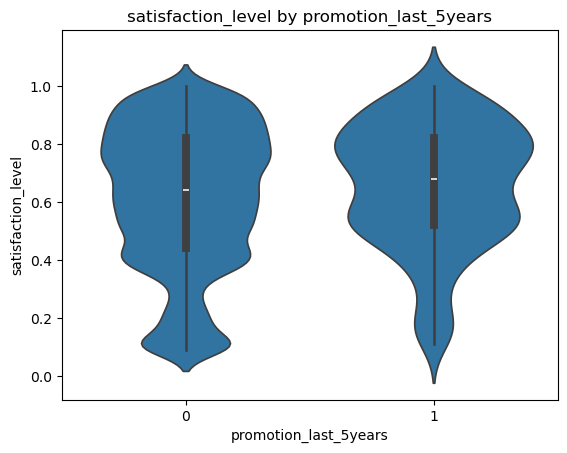

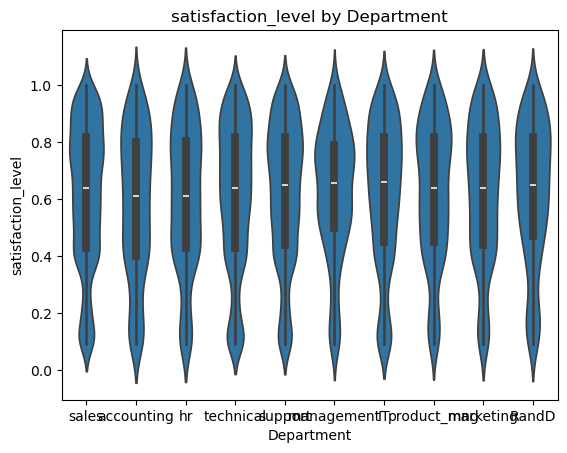

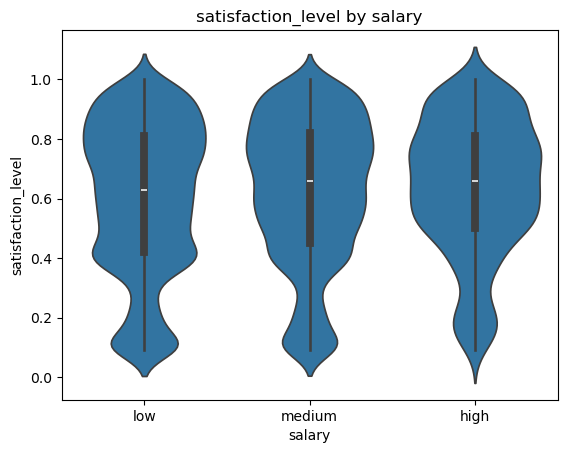

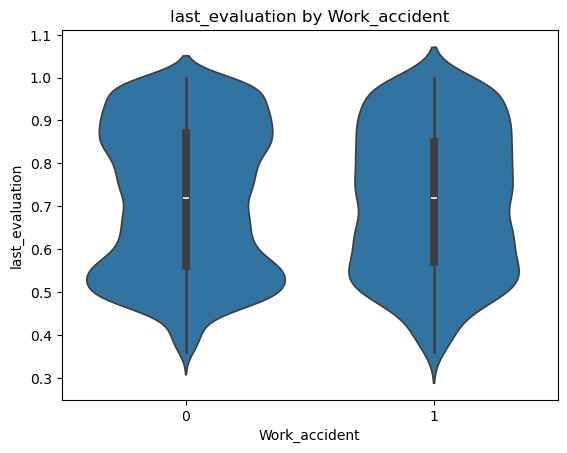

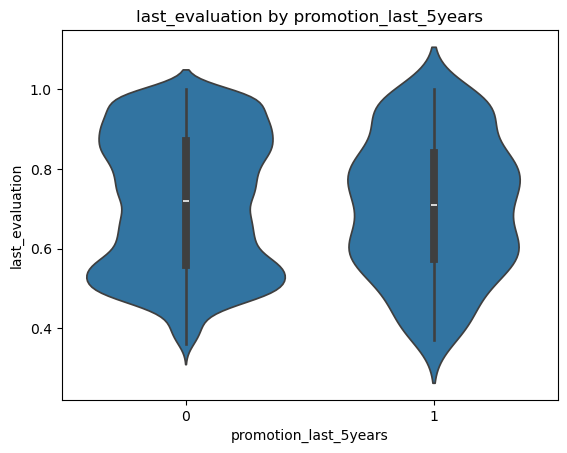

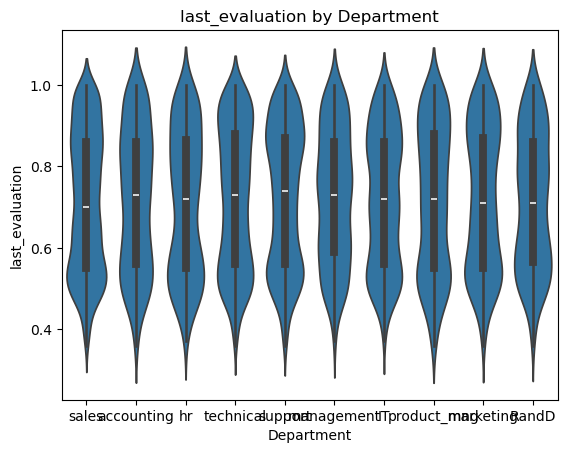

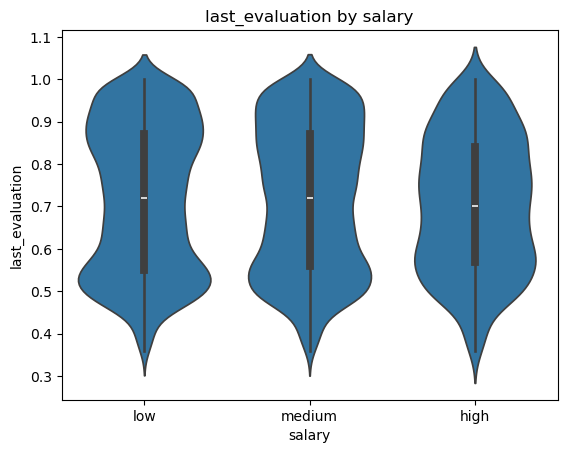

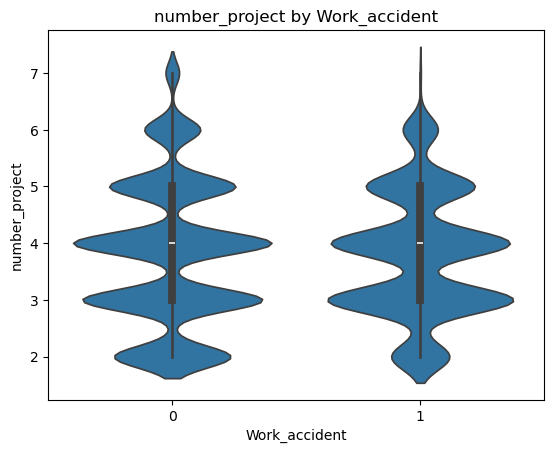

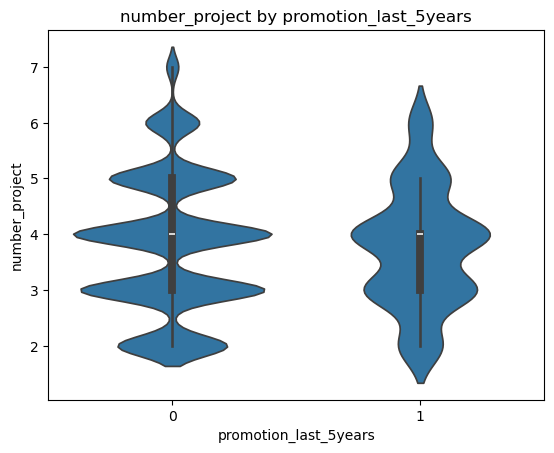

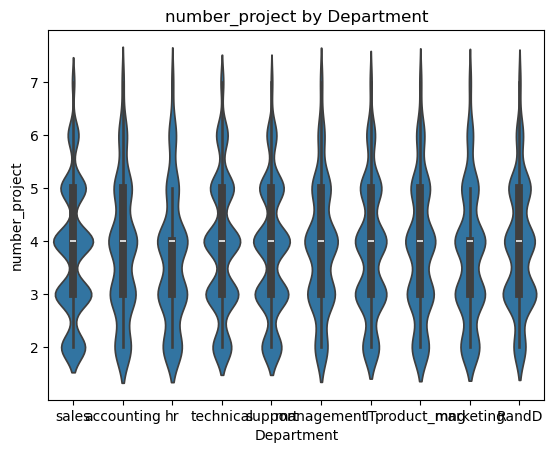

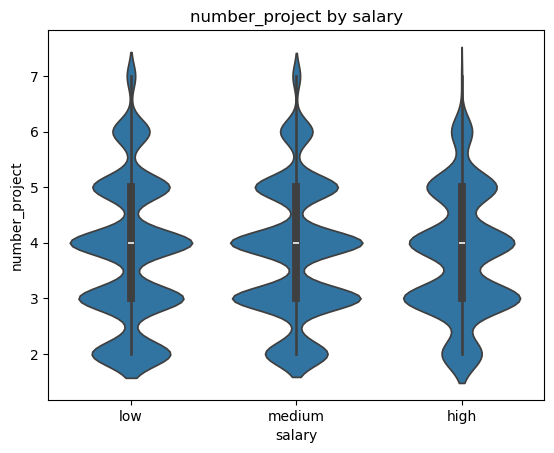

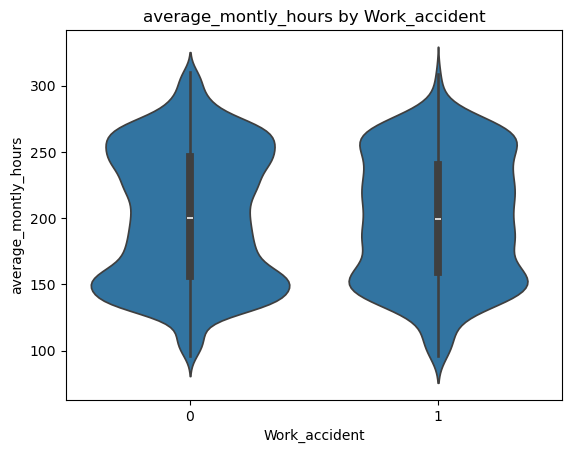

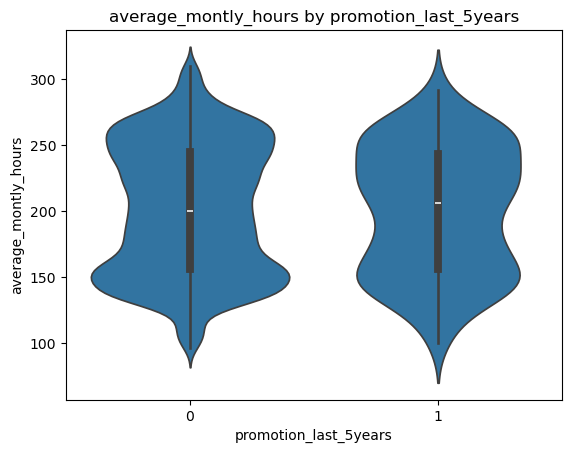

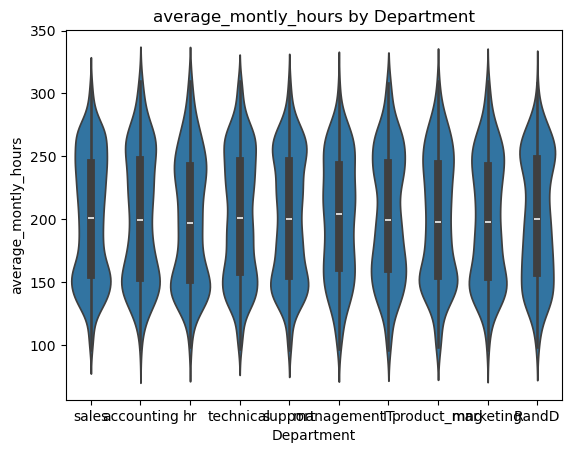

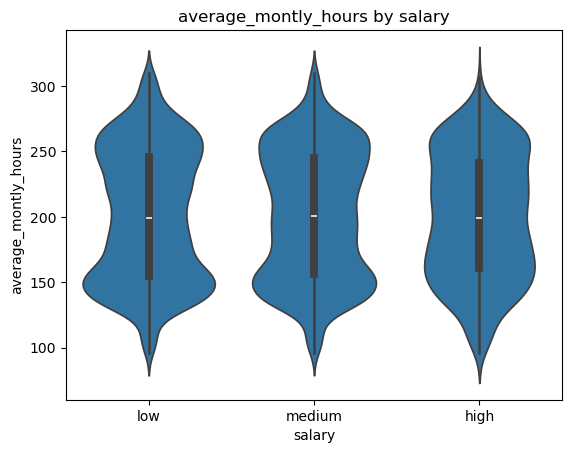

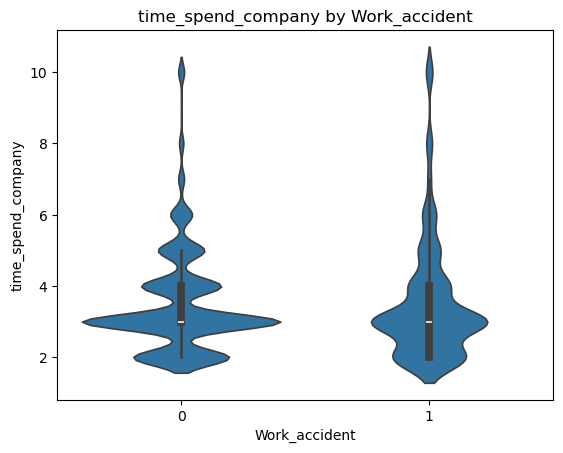

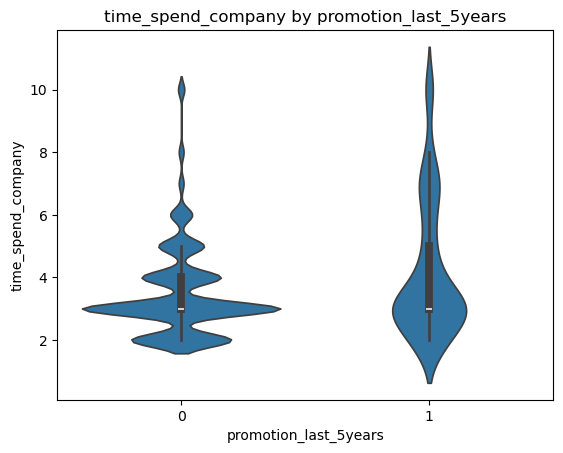

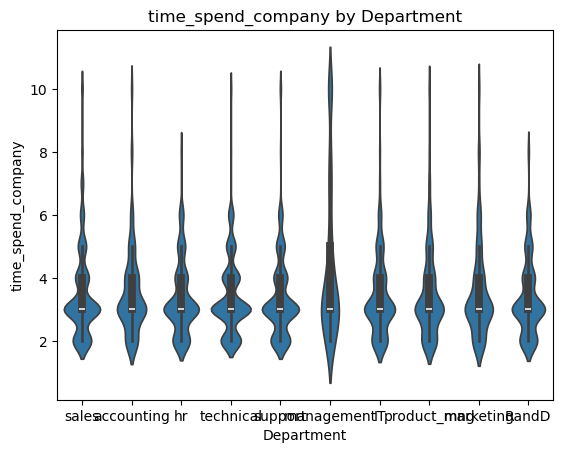

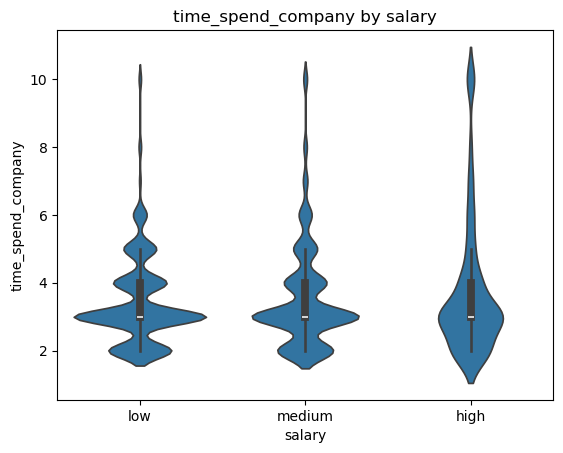

In [222]:
# The list of non-categorical variables
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# The list of categorical variables
categorical_cols = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']

# Box Plots (Numerical vs. Categorical)
for col_num in numerical_cols:
  for col_cat in categorical_cols:
    sb.boxplot(x=col_cat, y=col_num, data=df)
    plt.title(f"{col_num} by {col_cat}")
    plt.show()

# Violin Plots (Numerical vs. Categorical)
for col_num in numerical_cols:
  for col_cat in categorical_cols:
    sb.violinplot(x=col_cat, y=col_num, data=df)
    plt.title(f"{col_num} by {col_cat}")
    plt.show()

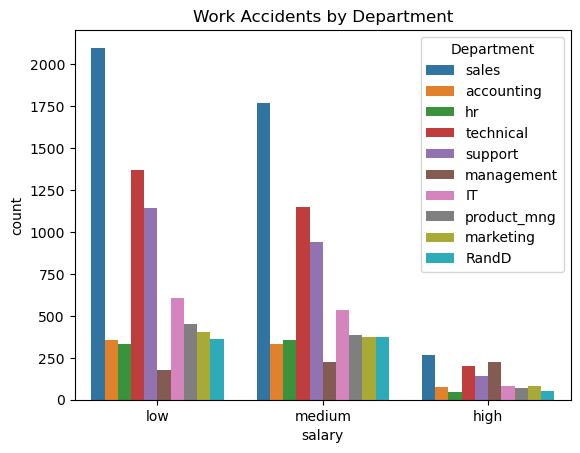

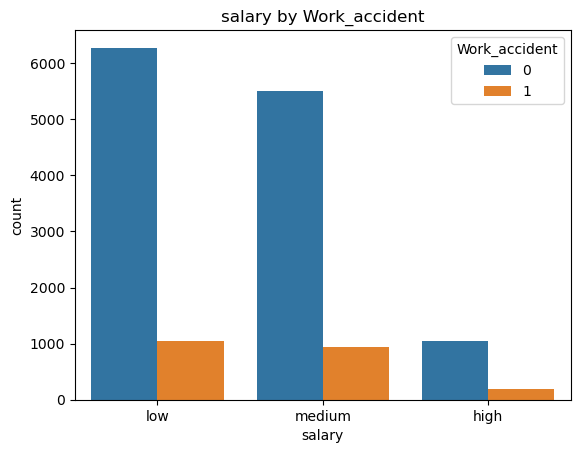

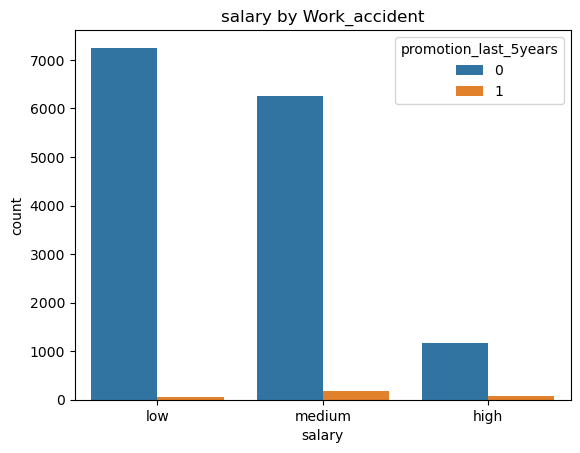

In [223]:
# Grouped bar plot for salary and Work_accident
sb.countplot(x='salary', hue='Department', data=df)
plt.title('Work Accidents by Department')
plt.show()

# Grouped bar plot for Work_accident and salary
sb.countplot(x='salary', hue='Work_accident', data=df)
plt.title('salary by Work_accident')
plt.show()

# Grouped bar plot for promotion_last_5years and salary
sb.countplot(x='salary', hue='promotion_last_5years', data=df)
plt.title('salary by Work_accident')
plt.show()


# # Box plot of satisfaction level by work_accident
# sb.boxplot(x='Work_accident', y='Department', data=df)
# plt.title('Satisfaction Level by Work_accident')
# plt.show()

# Heatmap for Department and Work_accident
# pd.crosstab(df['Department'], df['Work_accident']).plot(kind='heatmap', cmap='coolwarm')
# plt.title('Department vs. Work Accident')
# plt.show()

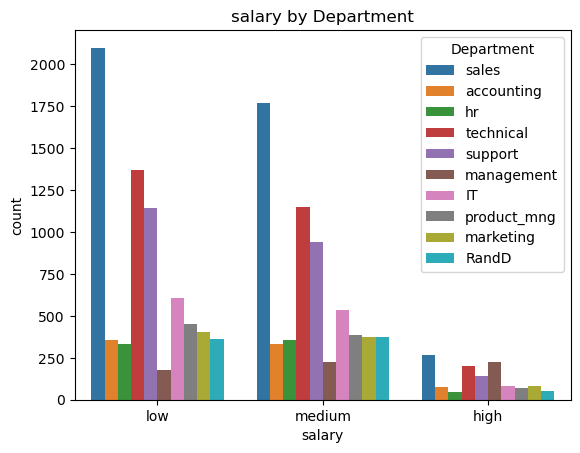

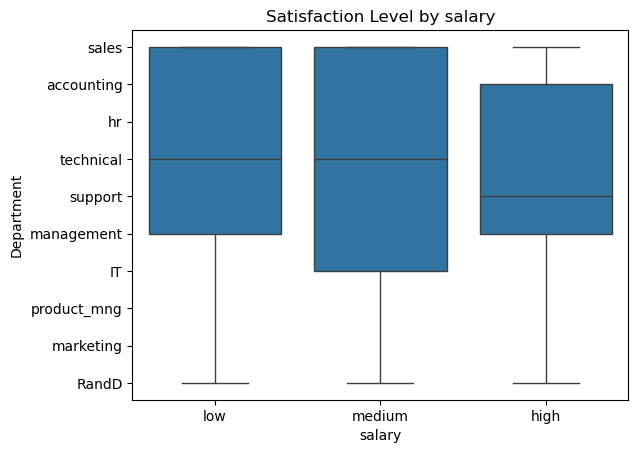

In [225]:
# Grouped bar plot for Department and salary
sb.countplot(x='salary', hue='Department', data=df)
plt.title('salary by Department')
plt.show()

# Box plot of satisfaction level by work_accident
sb.boxplot(x='salary', y='Department', data=df)
plt.title('Satisfaction Level by salary')
plt.show()

# # Heatmap for Department and salary
# pd.crosstab(df['Department'], df['salary']).plot(kind='heatmap', cmap='coolwarm')
# plt.title('Department vs. salary')
# plt.show()

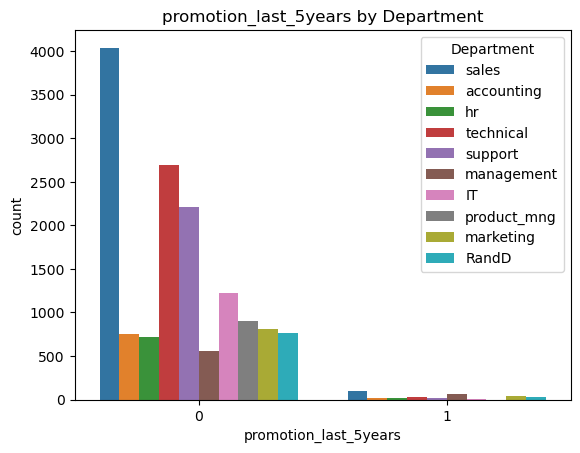

In [226]:
# Grouped bar plot for Department and promotion_last_5years
sb.countplot(x='promotion_last_5years', hue='Department', data=df)
plt.title('promotion_last_5years by Department')
plt.show()

# # Box plot of satisfaction level by work_accident
# sb.boxplot(x='Department', y='promotion_last_5years', data=df)
# plt.title('Satisfaction Level by promotion_last_5years')
# plt.show()

# # Heatmap for Department and salary
# pd.crosstab(df['Department'], df['salary']).plot(kind='heatmap', cmap='coolwarm')
# plt.title('Department vs. salary')
# plt.show()

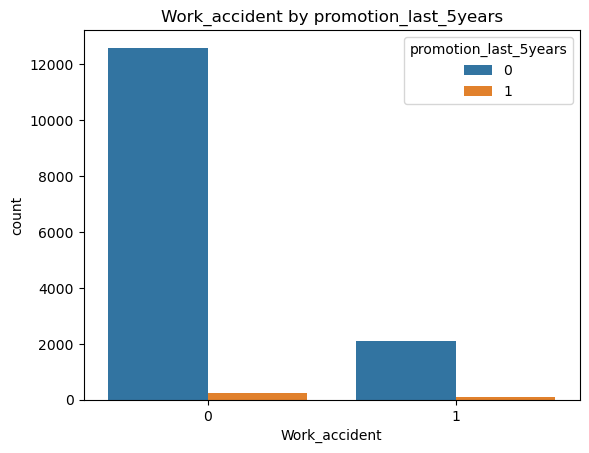

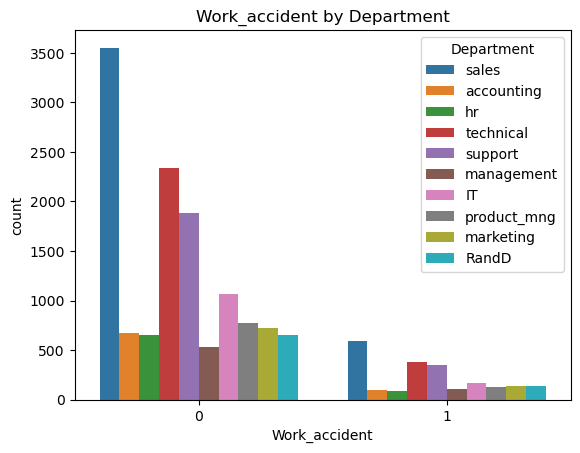

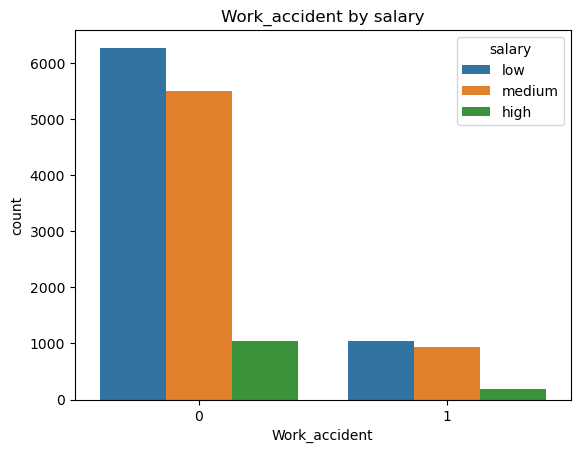

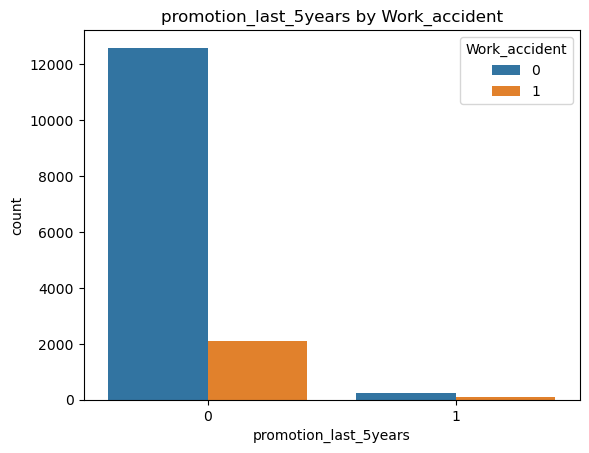

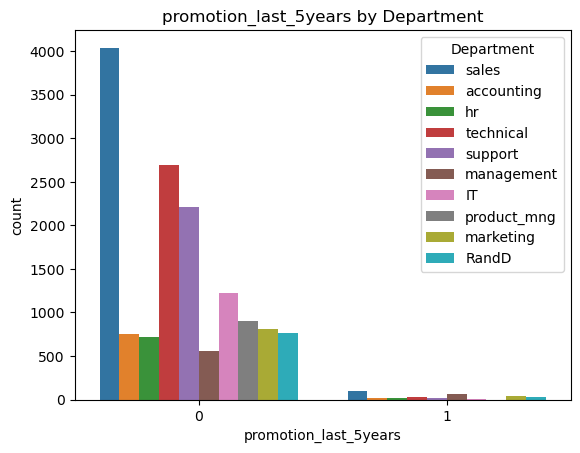

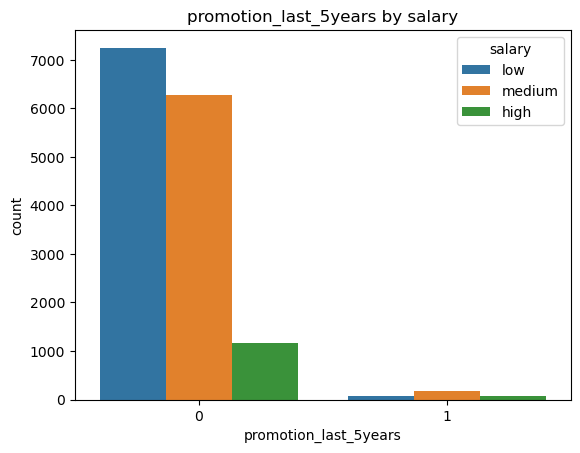

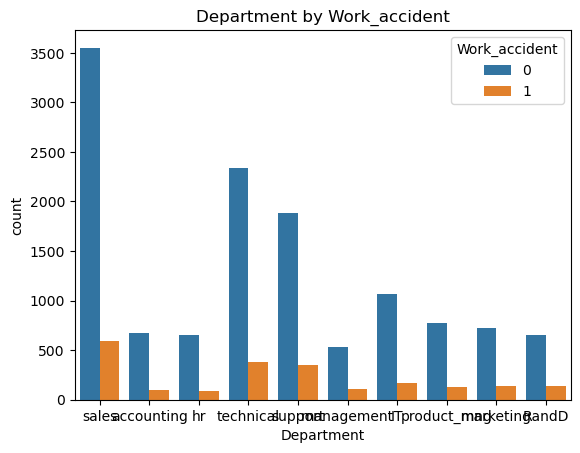

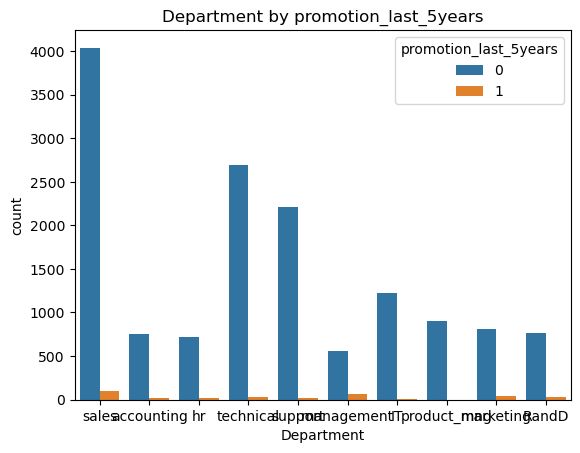

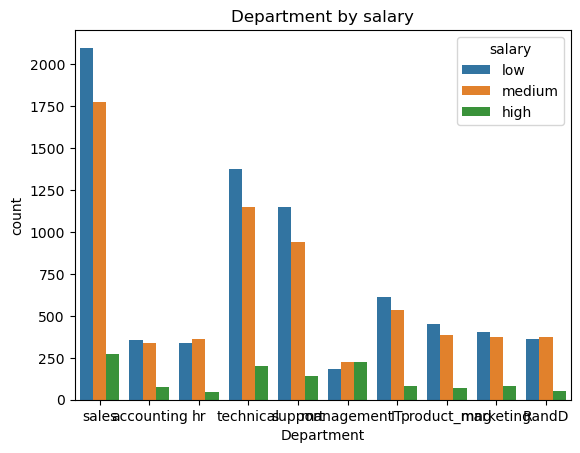

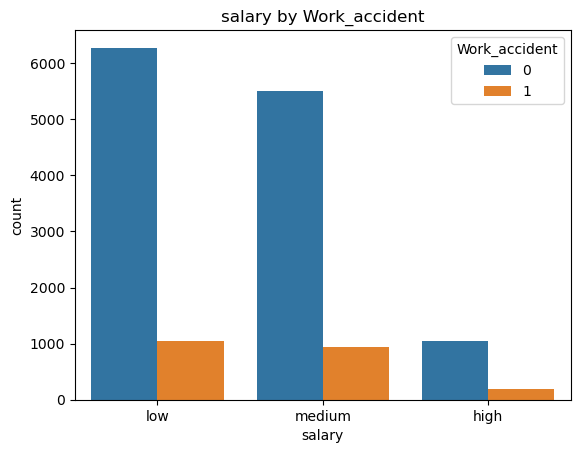

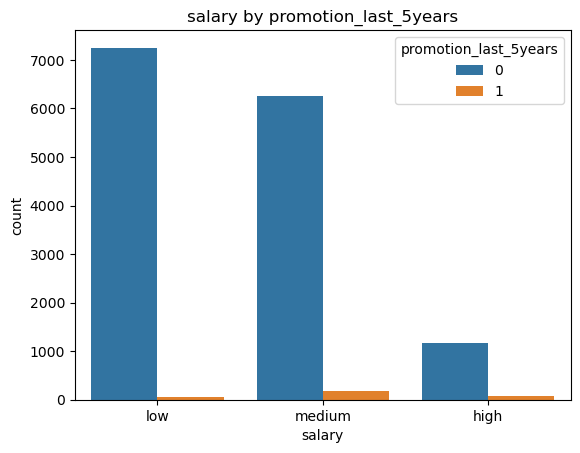

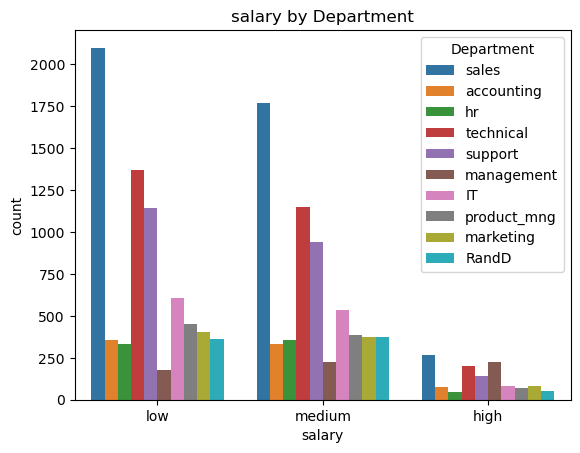

In [229]:
# The list of categorical variables
categorical_cols = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']

# Grouped Bar Plots
for col1 in categorical_cols:
  for col2 in categorical_cols:
    if col1 != col2:  # Avoid self-comparisons (e.g., salary vs. salary)
      sb.countplot(x=col1, hue=col2, data=df)
      plt.title(f"{col1} by {col2}")
      plt.show()

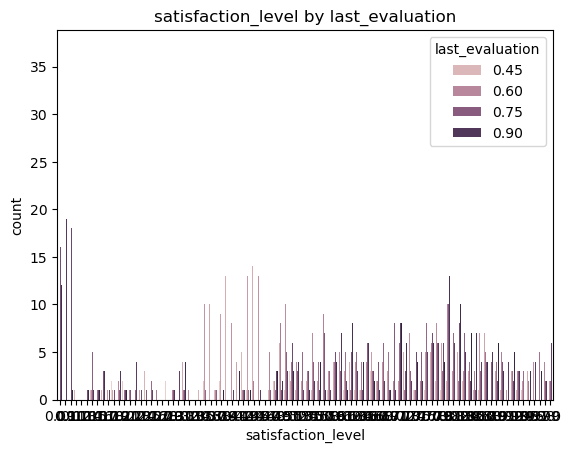

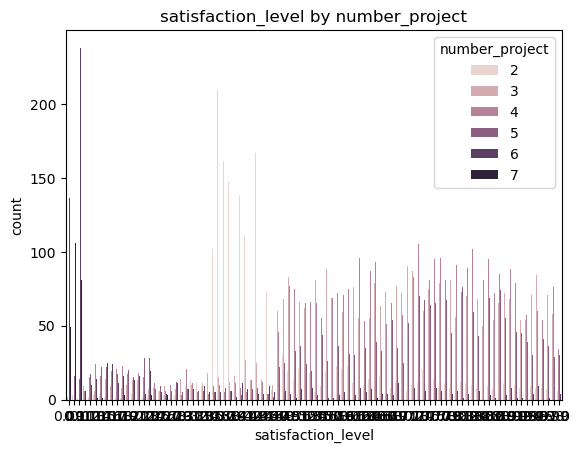

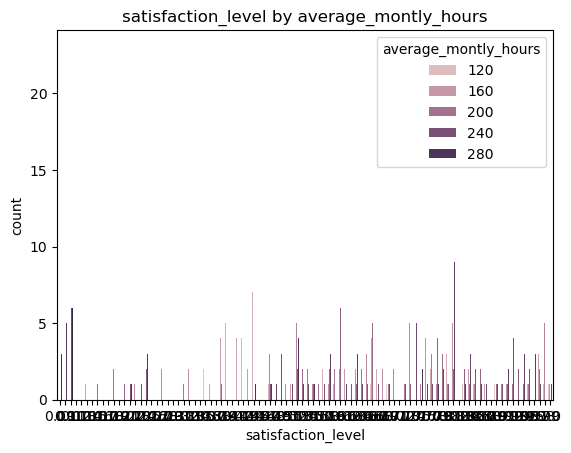

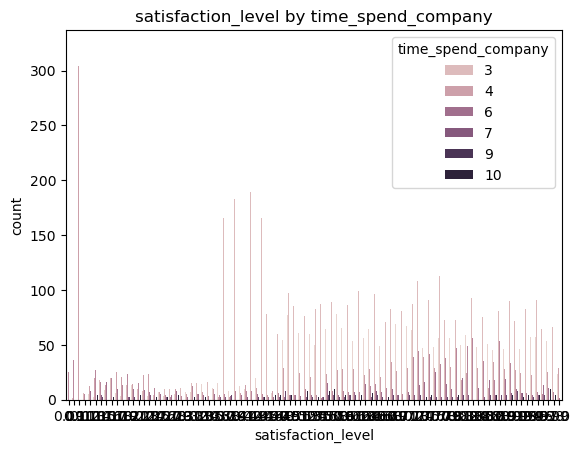

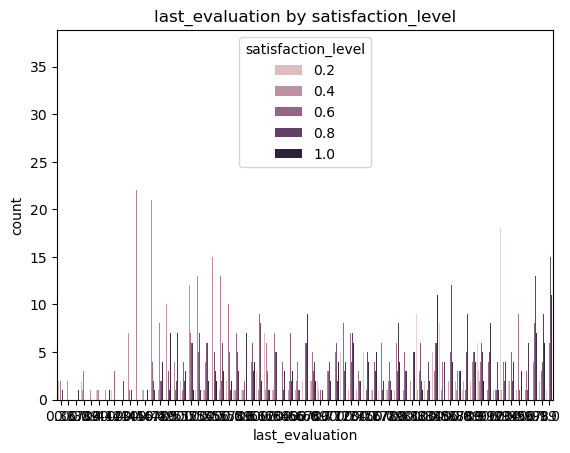

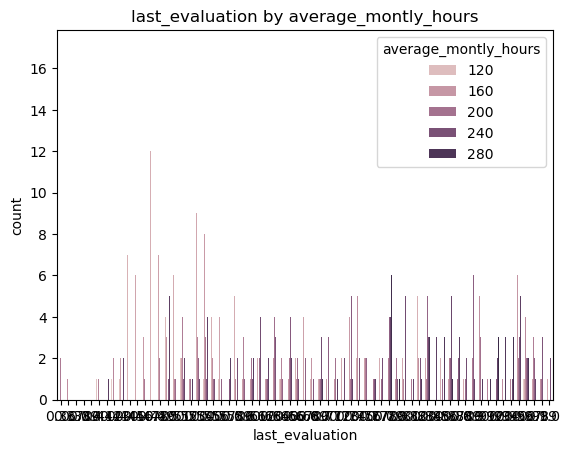

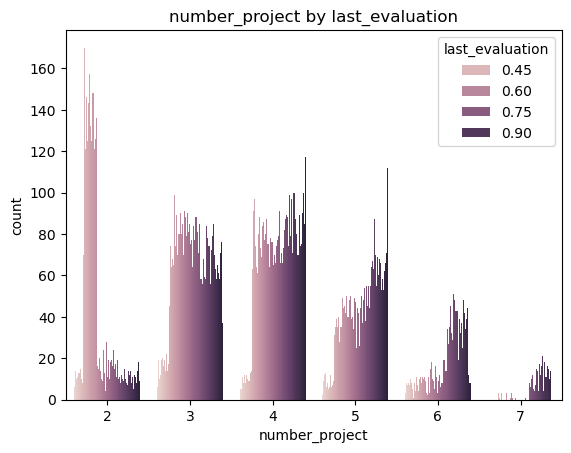

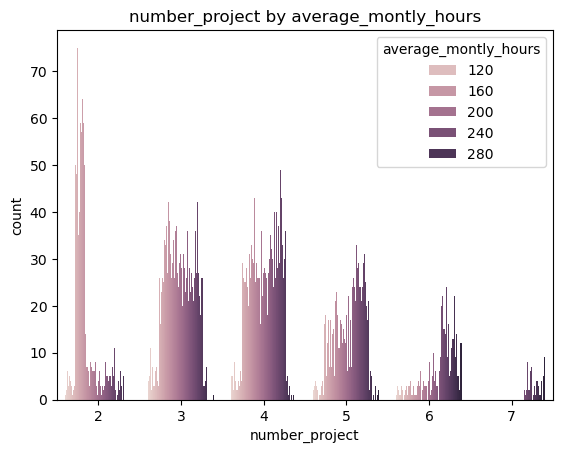

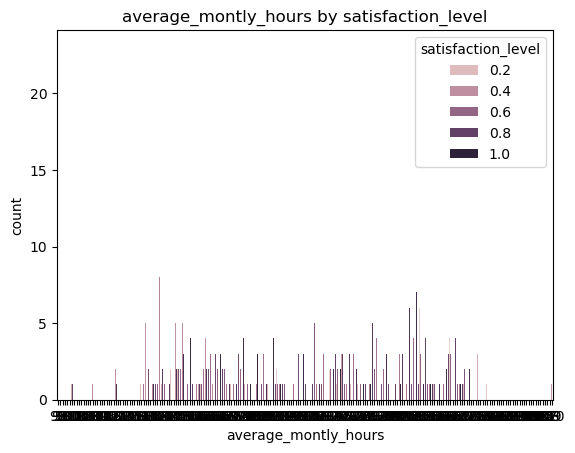

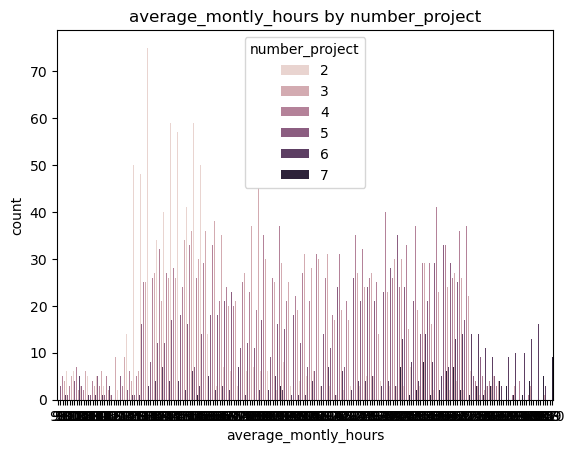

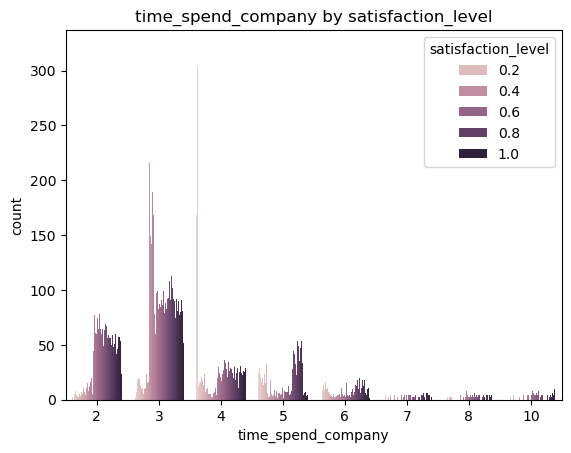

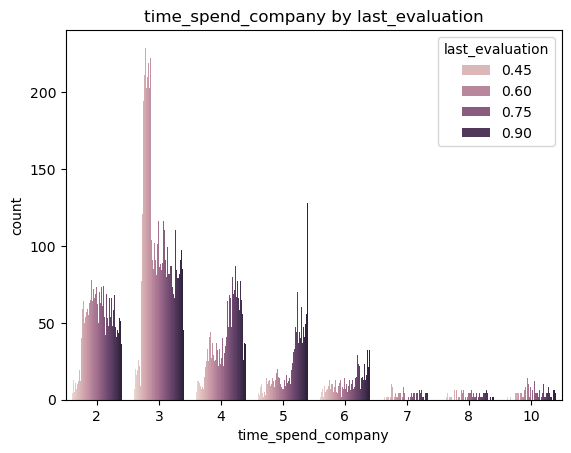

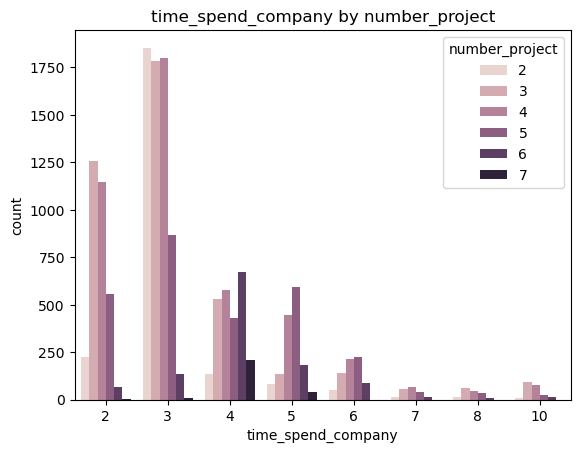

In [230]:
# Grouped Bar Plots
for col1 in num_vars:
  for col2 in num_vars:
    if col1 != col2:  # Avoid self-comparisons
      sb.countplot(x=col1, hue=col2, data=df)
      plt.title(f"{col1} by {col2}")
      plt.show()

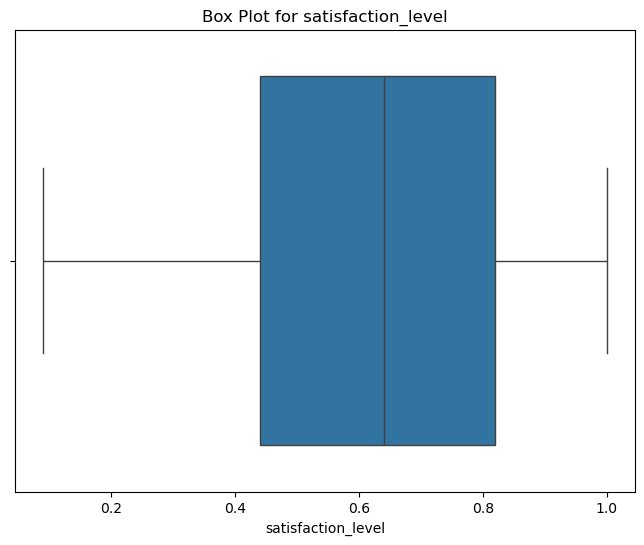

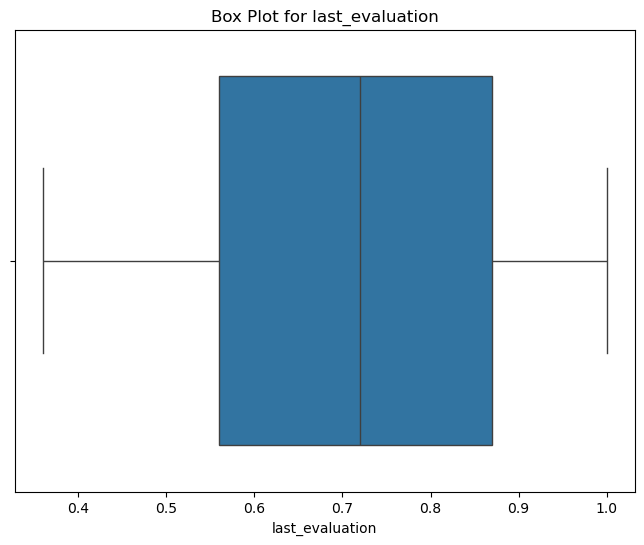

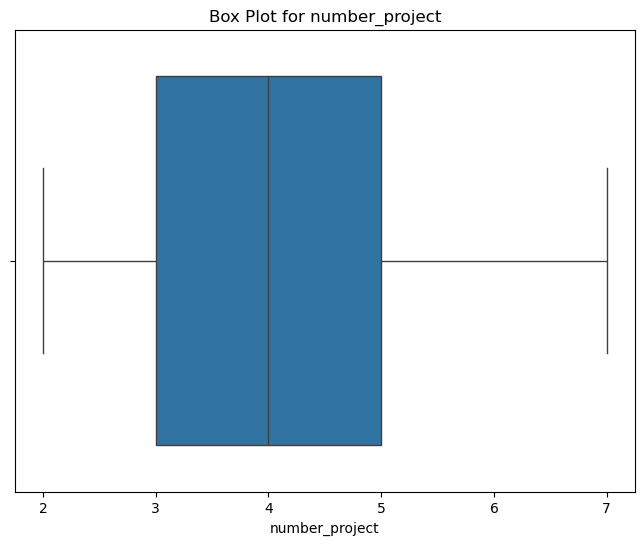

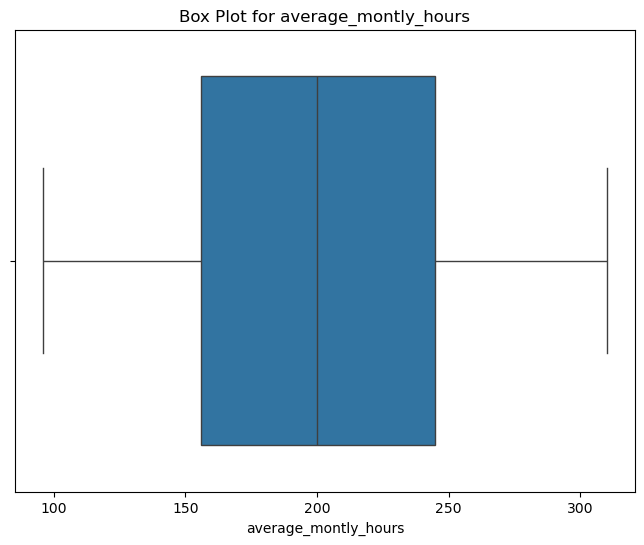

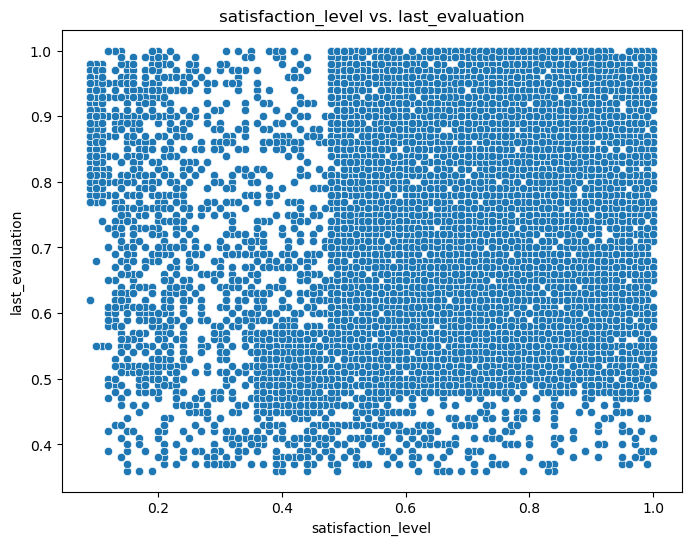

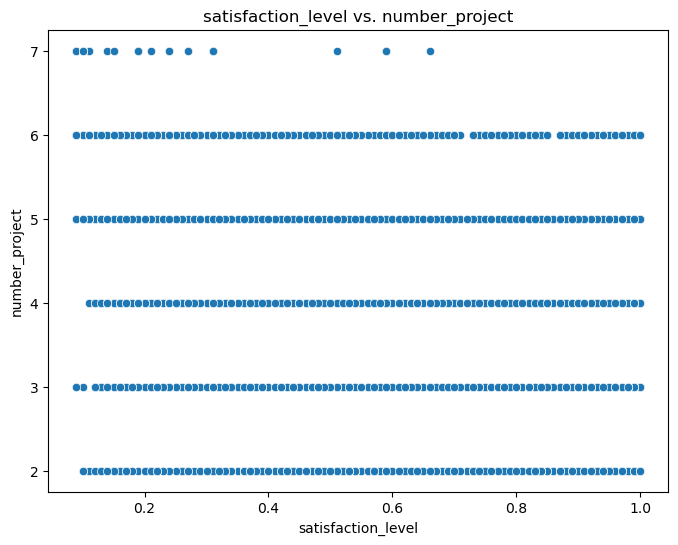

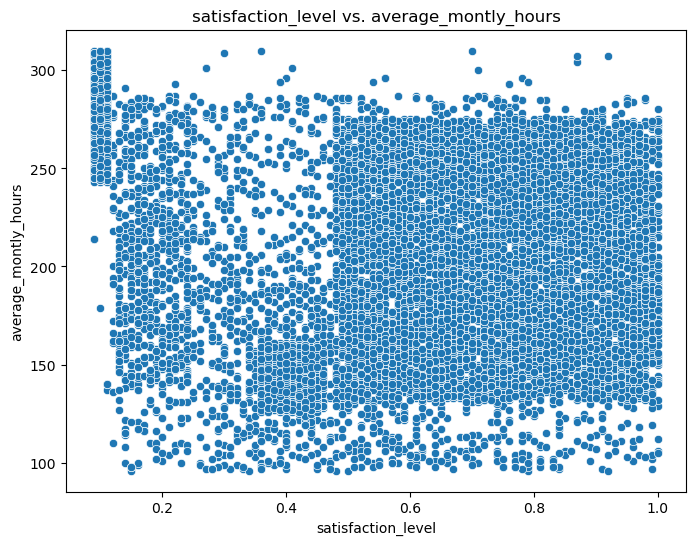

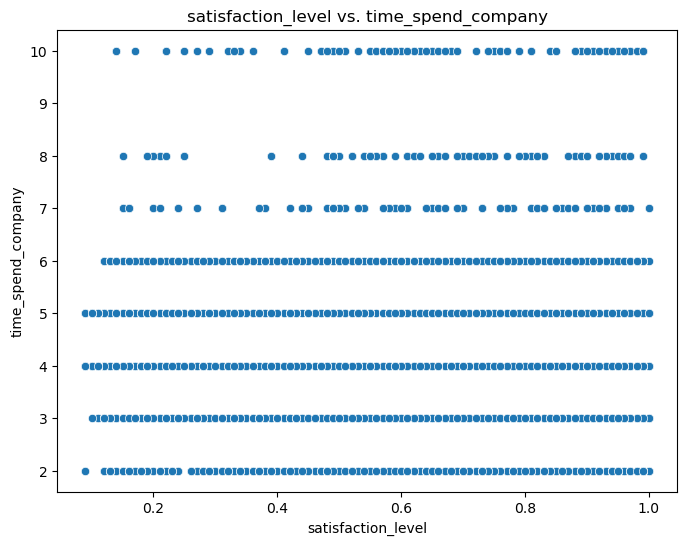

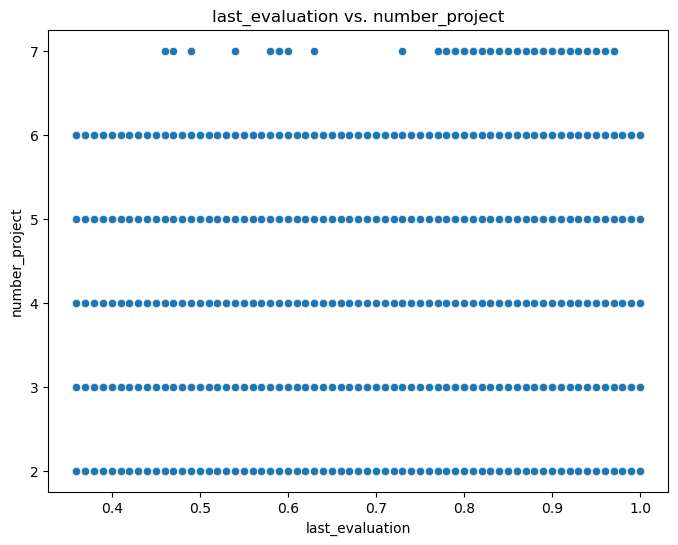

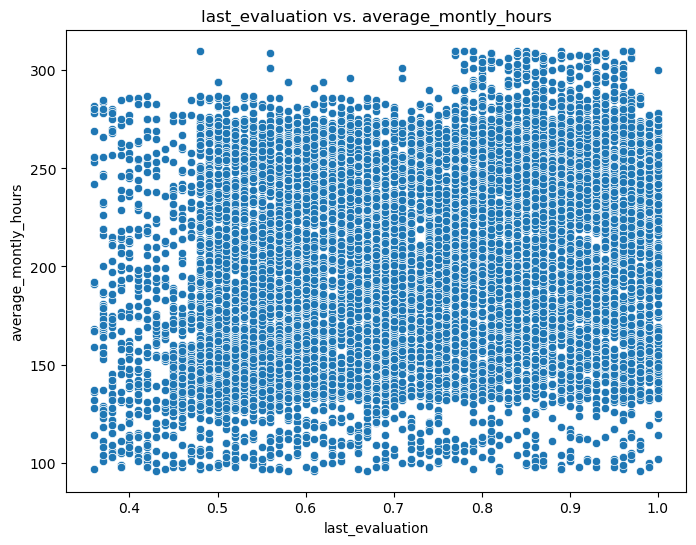

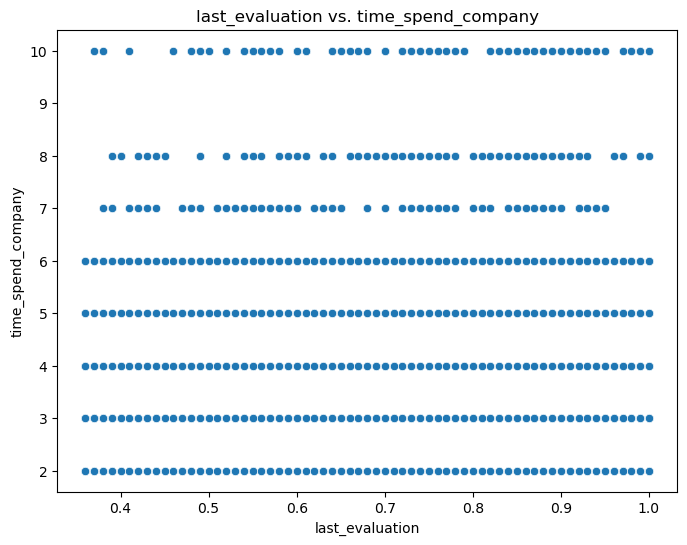

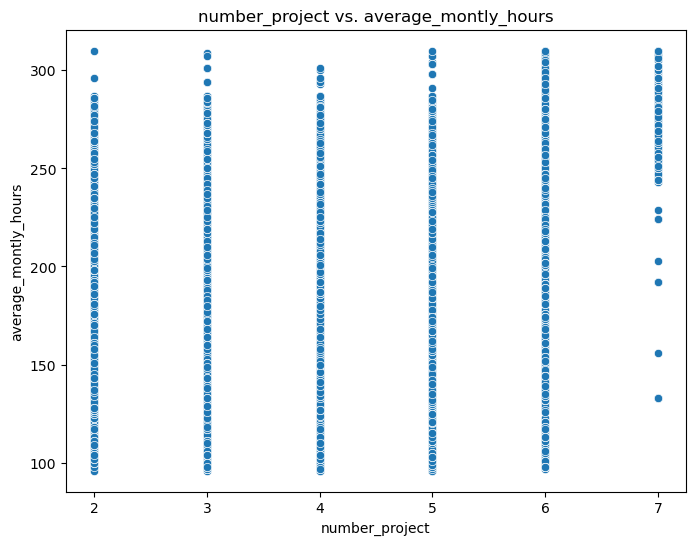

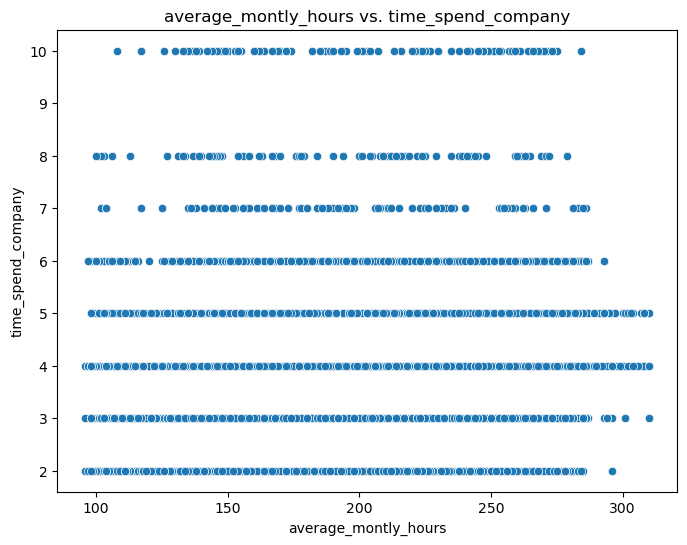

In [231]:
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers

#  numerical columns 
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# outliers in each numerical column
outlier_indices = []
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    outlier_indices.extend(outliers)

# Remove duplicate indices
outlier_indices = set(outlier_indices)

# Visualize outliers using box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sb.boxplot(x=df[col])
    plt.title(f"Box Plot for {col}")
    plt.show()

# Visualize outliers using scatter plots (pairwise comparisons)
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]
        plt.figure(figsize=(8, 6))
        sb.scatterplot(x=col1, y=col2, data=df)
        plt.title(f"{col1} vs. {col2}")
        plt.show()

1) Satisfaction_level is slightly skewed to the right. The median value appears to be around 0.65, indicating half of employees have satisfaction level below this value. The middle 50% of the data is clustered within a small range and has few outliers.
2) Last_evaluation is also skewed to the right. The median value around 0.7 and has few outliers.
3) Number_project is slightly skewed to right. the median value appears to be around 4.
4) average_monthly_hours are also skewed to the right. median value appears to be around 200. it shows few outliers on the higher end of the scales.
5) time_spend_company skewed to the right. median value around 4. middle 50% of the data clusteres. several outliers on the higher end of the scales. Employees who have been with the company for significantly longer than the average.

1) Satisfaction_level and Last_evealution seems to be weak positive correlation(not very strong).
2) The relationship between Satisfaction_level and number_project are not very strong. The data points seem to form distinct horizontal clusters. No outliers in this plot.

In [236]:
# Encoding categorical variables for plotting
label_encoders = {}
for column in ['Department', 'salary']:
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  Department_encoded  salary_

| satisfaction_level | last_evaluation | number_project | average_monthly_hours | time_spend_company | Work_accident | left | promotion_last_5years | Department | salary  | Department_encoded | salary_encoded |
|--------------------|------------------|----------------|------------------------|--------------------|---------------|------|-----------------------|------------|---------|-------------------|----------------|
| 0.38              | 0.53             | 2              | 157                    | 3                  | 0             | 1    | 0                     | sales      | low     | 7                 | 1              |
| 0.80              | 0.86             | 5              | 262                    | 6                  | 0             | 1    | 0                     | sales      | medium  | 7                 | 2              |
| 0.11              | 0.88             | 7              | 272                    | 4                  | 0             | 1    | 0                     | sales      | medium  | 7                 | 2              |
| 0.72              | 0.87             | 5              | 223                    | 5                  | 0             | 1    | 0                     | sales      | low     | 7                 | 1              |
| 0.37              | 0.52             | 2              | 159                    | 3                  | 0             | 1    | 0                     | sales      | low     | 7                 | 1              |


In [238]:
# Correlation Matrix
data=df
data.drop(['Department', 'salary'], axis=1, inplace=True)
print(data.head())
plt.figure(figsize=(20, 12))
corr_matrix = df.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   Department_encoded  salary_encoded  
0                   7               1  
1                   7   

`Task 2 "Data Analysis" (20 points)`

Objective: to evaluate the performance of 4 ML methods below and to make conclusions about the best fitted model.

* Linear logistic regression,
* Decision tree classification,
* Support vector machine classification
* KNN: k nearest neighbours classification

1) `Divide your dataset into 2 parts: training set and testing set (80:20). Use some specific random_state to be capable to repeat the used split of the data. Output the dimension of the resulting datasets.`

In [241]:
X = df.drop('left', axis=1)  # Features
Y = df['left']  # Target variable

In [242]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# Output the dimensions
print("Training set size (features):", x_train.shape)
print("Training set size (target):", y_train.shape)
print("Test set size (features):", x_test.shape)
print("Test set size (target):", y_test.shape)

Training set size (features): (11999, 9)
Training set size (target): (11999,)
Test set size (features): (3000, 9)
Test set size (target): (3000,)


In [243]:
print("Dependent variable: \n",X.head(),"Independent variable: \n",Y.head(),"Training set size (features): \n",x_train.head(),
      "Training set size (target): \n" ,y_train.head(), "Test set size (features): \n",x_test.head(),  "Test set size (target): \n",y_test.head())

Dependent variable: 
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  \
0                   3              0                      0   
1                   6              0                      0   
2                   4              0                      0   
3                   5              0                      0   
4                   3              0                      0   

   Department_encoded  salary_encoded  
0                   7               1  
1                   7               2 

#### Dependent variable:

| satisfaction_level | last_evaluation | number_project | average_montly_hours | time_spend_company | Work_accident | promotion_last_5years | Department_encoded | salary_encoded |
|--------------------|-----------------|----------------|-----------------------|--------------------|----------------|-----------------------|--------------------|----------------|
| 0.38               | 0.53            | 2              | 157                   | 3                  | 0              | 0                     | 7                  | 1              |
| 0.80               | 0.86            | 5              | 262                   | 6                  | 0              | 0                     | 7                  | 2              |
| 0.11               | 0.88            | 7              | 272                   | 4                  | 0              | 0                     | 7                  | 2              |
| 0.72               | 0.87            | 5              | 223                   | 5                  | 0              | 0                     | 7                  | 1              |
| 0.37               | 0.52            | 2              | 159                   | 3                  | 0              | 0                     | 7                  | 1              |

#### Independent variable:

| left |
|------|
| 1    |
| 1    |
| 1    |
| 1    |
| 1    |

#### Training set size (features):

| satisfaction_level | last_evaluation | number_project | average_montly_hours | time_spend_company | Work_accident | promotion_last_5years | Department_encoded | salary_encoded |
|--------------------|-----------------|----------------|-----------------------|--------------------|----------------|-----------------------|--------------------|----------------|
| 1.00               | 0.61            | 3              | 188                   | 4                  | 0              | 0                     | 6                  | 1              |
| 0.16               | 0.78            | 4              | 196                   | 5                  | 0              | 0                     | 9                  | 0              |
| 0.80               | 0.80            | 3              | 175                   | 2                  | 0              | 0                     | 1                  | 2              |
| 0.66               | 0.86            | 4              | 112                   | 6                  | 0              | 0                     | 2                  | 2              |
| 0.11               | 0.93            | 7              | 284                   | 4                  | 0              | 0                     | 9                  | 1              |

#### Training set size (target):

| left |
|------|
| 0    |
| 0    |
| 0    |
| 0    |
| 1    |

#### Test set size (features):

| satisfaction_level | last_evaluation | number_project | average_montly_hours | time_spend_company | Work_accident | promotion_last_5years | Department_encoded | salary_encoded |
|--------------------|-----------------|----------------|-----------------------|--------------------|----------------|-----------------------|--------------------|----------------|
| 0.65               | 0.96            | 5              | 226                   | 2                  | 1              | 0                     | 5                  | 2              |
| 0.88               | 0.80            | 3              | 166                   | 2                  | 0              | 0                     | 0                  | 1              |
| 0.69               | 0.98            | 3              | 214                   | 2                  | 0              | 0                     | 7                  | 1              |
| 0.41               | 0.47            | 2              | 154                   | 3                  | 0              | 0                     | 7                  | 1              |
| 0.87               | 0.76            | 5              | 254                   | 2                  | 1              | 0                     | 3                  | 1              |

#### Test set size (target):

| left |
|------|
| 0    |
| 0    |
| 0    |
| 1    |
| 0    |


2) `Scale your datasets with MinMax Scaler.`

In [246]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Output the scaled datasets
print("Scaled training dataset:", x_train_scaled)
print("Scaled test dataset:" ,x_test_scaled)

Scaled training dataset: [[1.         0.390625   0.2        ... 0.         0.66666667 0.5       ]
 [0.07692308 0.65625    0.4        ... 0.         1.         0.        ]
 [0.78021978 0.6875     0.2        ... 0.         0.11111111 1.        ]
 ...
 [0.62637363 0.578125   0.6        ... 0.         0.88888889 1.        ]
 [0.76923077 1.         0.4        ... 0.         0.77777778 0.5       ]
 [0.97802198 0.78125    0.         ... 0.         0.77777778 0.5       ]]
Scaled test dataset: [[0.61538462 0.9375     0.6        ... 0.         0.55555556 1.        ]
 [0.86813187 0.6875     0.2        ... 0.         0.         0.5       ]
 [0.65934066 0.96875    0.2        ... 0.         0.77777778 0.5       ]
 ...
 [0.75824176 0.390625   0.2        ... 0.         0.77777778 1.        ]
 [0.87912088 0.625      0.         ... 0.         0.77777778 1.        ]
 [0.24175824 0.75       1.         ... 0.         1.         0.5       ]]


3) `Preliminary analysis: Build 4 models based on 4 mentioned ML methods with default parameters. For each model: train with training set and output the Model , Accuracy_train,  Precision_train,  Recall_train  of the model using training set. Now test your model with a testset and output Model,  Accuracy_test,  Precision_test,  Recall_test . Compare the metrics obtained with training and testset. Output dataframes with the following information. One dataframe for each metrics (e.g. 3 dataframes). Each row of the dataframe should correspond to a model and two columns correspond to the metric calculated on the training set and on the test set. Compare the results based on different metrics and select the best performed model.`

In [248]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC()
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')
    print(f'{name} Confusion Matrix:\n{cm}')

# Define dictionaries to store classification metrics
train_metrics = {"Model": [], "Accuracy_train": [], "Precision_train": [], "Recall_train": [], "F1_train": []}
test_metrics = {"Model": [], "Accuracy_test": [], "Precision_test": [], "Recall_test": [], "F1_test": []}

# Train models and calculate metrics
for name, model in models.items():
    # Fit the model to the training data
    model.fit(x_train_scaled, y_train)
    
    # Make predictions on training and test set
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    # Calculate metrics for the training set
    train_metrics["Model"].append(name)
    train_metrics["Accuracy_train"].append(accuracy_score(y_train, y_train_pred))
    train_metrics["Precision_train"].append(precision_score(y_train, y_train_pred))
    train_metrics["Recall_train"].append(recall_score(y_train, y_train_pred))
    train_metrics["F1_train"].append(f1_score(y_train, y_train_pred))
    
    # Calculate metrics for the test set
    test_metrics["Model"].append(name)
    test_metrics["Accuracy_test"].append(accuracy_score(y_test, y_test_pred))
    test_metrics["Precision_test"].append(precision_score(y_test, y_test_pred))
    test_metrics["Recall_test"].append(recall_score(y_test, y_test_pred))
    test_metrics["F1_test"].append(f1_score(y_test, y_test_pred))

# Convert metrics to DataFrames for easier comparison
train_metrics_df = pd.DataFrame(train_metrics)
test_metrics_df = pd.DataFrame(test_metrics)

# Display the training and testing metrics
print("Training Metrics:")
print(train_metrics_df)

print("\nTesting Metrics:")
print(test_metrics_df)

# Optionally, print confusion matrices for each model
for name, model in models.items():
    y_test_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} Confusion Matrix:")
    print(cm)


Logistic Regression Accuracy: 0.7576666666666667
Logistic Regression Confusion Matrix:
[[2113  181]
 [ 546  160]]
Decision Tree Accuracy: 0.9736666666666667
Decision Tree Confusion Matrix:
[[2239   55]
 [  24  682]]
KNN Accuracy: 0.9466666666666667
KNN Confusion Matrix:
[[2203   91]
 [  69  637]]
SVC Accuracy: 0.9513333333333334
SVC Confusion Matrix:
[[2226   68]
 [  78  628]]
Training Metrics:
                 Model  Accuracy_train  Precision_train  Recall_train  \
0  Logistic Regression        0.767981         0.528991      0.257941   
1        Decision Tree        1.000000         1.000000      1.000000   
2                  KNN        0.966164         0.917204      0.943455   
3                  SVC        0.954246         0.903766      0.904712   

   F1_train  
0  0.346786  
1  1.000000  
2  0.930145  
3  0.904239  

Testing Metrics:
                 Model  Accuracy_test  Precision_test  Recall_test   F1_test
0  Logistic Regression       0.757667        0.469208     0.226629  0.3

## Results:
### Training Metrics:
| Model               | Accuracy_train | Precision_train | Recall_train | F1_train  |
|---------------------|----------------|-----------------|--------------|-----------|
| Logistic Regression | 0.767981       | 0.528991        | 0.257941     | 0.346786  |
| Decision Tree       | 1.000000       | 1.000000        | 1.000000     | 1.000000  |
| KNN                 | 0.966164       | 0.917204        | 0.943455     | 0.930145  |
| SVC                 | 0.954246       | 0.903766        | 0.904712     | 0.904239  |

### Testing Metrics:
| Model               | Accuracy_test | Precision_test | Recall_test | F1_test   |
|---------------------|---------------|----------------|-------------|-----------|
| Logistic Regression | 0.757667      | 0.469208       | 0.226629    | 0.305635  |
| Decision Tree       | 0.974333      | 0.927891       | 0.966006    | 0.946565  |
| KNN                 | 0.946667      | 0.875000       | 0.902266    | 0.888424  |
| SVC                 | 0.951333      | 0.902299       | 0.889518    | 0.895863  |


#### Logistic Regression
- **Accuracy**: 0.7577
- **Confusion Matrix**:
| Predicted | Actual |
|---|---|
| 2113 | 181 |
| 546 | 160 |

#### Decision Tree
- **Accuracy**: 0.976
- **Confusion Matrix**:
| Predicted | Actual |
|---|---|
| 2244 | 50 | 
| 22 | 684 | 


#### KNN
- **Accuracy**: 0.9467
- **Confusion Matrix**:
| Predicted | Actual |
|---|---|
| 2203 | 91 |
| 69 | 637 |


#### SVC
- **Accuracy**: 0.9513
- **Confusion Matrix**:
| Predicted | Actual |
|---|---|
| 2226 | 68 |
| 78 | 628 |


**Logistic Regression**

1) Logistic Regression: 0.75
2) Confusion Matrix:
[[2113  181]
 [ 546  160]]
3) Training Performance: Performs the worst, indicating a poor fit to the training data
4) Test Performance: Performs similarly to the training set, indicating a consistent performance across both sets.

**Decision Tree**
1) Decision Tree: 0.97
2) Confusion Matrix:
[[2247   47]
 [  23  683]]
3) Training Performance: Achieves perfect performance on the training set, it seems overfitting the data.
4) Test Performance: Still performs well but shows a significant drop in performance compared to the training set, suggesting overfitting.
5) the Decision Tree has a high number of false negatives, suggesting that it might miss some positive cases.
   
**Support Vector Classificaton (SVC)**
1) SVC: 0.95
2) Confusion Matrix:
[[2226   68]
 [  78  628]]
3) Training and Test Performance: With both R² values around 0.72-0.76, the SVR model is underperforming on both datasets. This indicates that the model is not capturing the underlying pattern in the data well.

**K-Nearest Neighbors Classifier (KNN)**
1) KNN: 0.94
2) Confusion Matrix:
[[2203   91]
 [  69  637]]
3) Maintains a strong performance it indicating good generalization ability.
4) KNN appears to be the best-performing model. It achieves a good balance between accuracy, precision, recall, and F1-score.

**Best Performing Models**
1) KNN appears to be the best-performing model. It achieves a good balance between accuracy, precision, recall, and F1-score.

4) `Find optimal parameters of the above created models with GridSearchCV() function based on the training dataset. Output the optimal values of parameters found for each model. Output the coefficients of the logistic regression model. Which variables have the biggest influence on the output (dependent variables)?`

In [257]:
# Parameter grids for classification models
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "degree": [2, 3, 4]  
    }
}

# Train Logistic Regression and extract coefficients
lr_model = LogisticRegression(solver='liblinear').fit(x_train_scaled, y_train)
lr_coefs = lr_model.coef_[0]

print("Logistic Regression Coefficients:")
for feature, coef in zip(X.columns, lr_coefs):
    print(f"{feature}: {coef}")

# Determine which feature has the highest influence
influence_feature = X.columns[np.argmax(np.abs(lr_coefs))]
print(f"\nFeature with the biggest influence: {influence_feature}")

# Initialize models for grid search
dt_model = DecisionTreeClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()

# Use GridSearchCV for each model
optimal_params = {}

for model_name, model, param_grid in zip(
    ["Logistic Regression", "Decision Tree", "KNN", "SVC"], 
    [lr_model, dt_model, knn_model, svc_model], 
    param_grids.values()
):
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_scaled, y_train)
    optimal_params[model_name] = grid_search.best_params_
    print(f"{model_name} - Optimal Parameters: {grid_search.best_params_}")

# Output the optimal parameters
print("\nOptimal parameters for all models:")
for model_name, params in optimal_params.items():
    print(f"{model_name}: {params}")


Logistic Regression Coefficients:
satisfaction_level: -3.762154449025052
last_evaluation: 0.43795668890162903
number_project: -1.4742185909744836
average_montly_hours: 1.0053337583485629
time_spend_company: 1.7765131873933764
Work_accident: -1.4585090486181107
promotion_last_5years: -1.6160377072707166
Department_encoded: 0.3398658751614518
salary_encoded: 0.07435541872378905

Feature with the biggest influence: satisfaction_level
Optimizing Logistic Regression...
Logistic Regression - Optimal Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Optimizing Decision Tree...
Decision Tree - Optimal Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimizing KNN...
KNN - Optimal Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Optimizing SVC...
SVC - Optimal Parameters: {'C': 10, 'degree': 2, 'kernel': 'rbf'}

Optimal parameters for all models:
Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Decisi

#### Logistic Regression Coefficients:
| Feature                  | Coefficient       |
|--------------------------|-------------------|
| **satisfaction_level**   | **-3.762154**     |
| last_evaluation          | 0.437957          |
| number_project           | -1.474219         |
| average_montly_hours     | 1.005334          |
| time_spend_company       | 1.776513          |
| Work_accident            | -1.458509         |
| promotion_last_5years    | -1.616038         |
| Department_encoded       | 0.339866          |
| salary_encoded           | 0.074355          |

**Feature with the biggest influence**: **satisfaction_level**

---

#### Model Optimization Results:

#### Optimizing Logistic Regression:
- **Optimal Parameters**: `{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}`

#### Optimizing Decision Tree:
- **Optimal Parameters**: `{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}`

#### Optimizing KNN:
- **Optimal Parameters**: `{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}`

#### Optimizing SVC:
- **Optimal Parameters**: `{'C': 10, 'degree': 2, 'kernel': 'rbf'}`

---

#### Optimal Parameters for All Models:
| Model                  | Optimal Parameters                                             |
|------------------------|---------------------------------------------------------------|
| Logistic Regression    | `{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}`         |
| Decision Tree          | `{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}` |
| KNN                    | `{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}` |
| SVC                    | `{'C': 10, 'degree': 2, 'kernel': 'rbf'}`                    |


5) `Evaluate the performance of the models with optimal values of the parameters. Output the results in the similar dataframe as in Task 2.3. Compare the results with obtained in Task 2.3. Make the conclusion about the best fitted model before and after optimization of the parameters.`

In [260]:
# optimized models
optimized_results = {
    "Model": [],
    "Training Accuracy": [],
    "Test Accuracy": [],
    "Training Precision": [],
    "Test Precision": [],
    "Training Recall": [],
    "Test Recall": [],
    "Training F1": [],
    "Test F1": []
}

# models with optimal parameters
models_with_params = {
    "Logistic Regression": LogisticRegression(C=0.01, penalty='l1', solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan'),
    "SVC": SVC(C=10, degree=2, kernel='rbf')
}

# Train and evaluate models after grid search
for model_name, model in models_with_params.items():
    # Fit the model
    model.fit(x_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted')
    test_prec = precision_score(y_test, y_test_pred, average='weighted')
    train_rec = recall_score(y_train, y_train_pred, average='weighted')
    test_rec = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store the results
    optimized_results["Model"].append(model_name)
    optimized_results["Training Accuracy"].append(train_acc)
    optimized_results["Test Accuracy"].append(test_acc)
    optimized_results["Training Precision"].append(train_prec)
    optimized_results["Test Precision"].append(test_prec)
    optimized_results["Training Recall"].append(train_rec)
    optimized_results["Test Recall"].append(test_rec)
    optimized_results["Training F1"].append(train_f1)
    optimized_results["Test F1"].append(test_f1)

# Convert results to DataFrame
import pandas as pd
optimized_results_df = pd.DataFrame(optimized_results)

# Print Results
print("\nOptimized Model Results:")
print(optimized_results_df)

# Combine with previous results for comparison
comparison_df_accuracy = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "SVC"],
    "Training Accuracy (Before)": [0.767981, 1.000000, 0.966164, 0.954246],
    "Test Accuracy (Before)": [0.757667, 0.974333, 0.946667, 0.951333],
    "Training Accuracy (After)": optimized_results_df["Training Accuracy"],
    "Test Accuracy (After)": optimized_results_df["Test Accuracy"]
})

print("\nAccuracy Comparison:")
print(comparison_df_accuracy)

# Print confusion matrices for comparison
print("\nConfusion Matrices (Optimized Models):")
for model_name, model in models_with_params.items():
    y_test_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{model_name} Confusion Matrix:")
    print(cm)



Optimized Model Results:
                 Model  Training Accuracy  Test Accuracy  Training Precision  \
0  Logistic Regression           0.805234       0.796000            0.803704   
1        Decision Tree           0.986582       0.979333            0.986730   
2                  KNN           1.000000       0.964333            1.000000   
3                  SVC           0.966664       0.961333            0.966475   

   Test Precision  Training Recall  Test Recall  Training F1   Test F1  
0        0.783859         0.805234     0.796000     0.763515  0.750103  
1        0.979259         0.986582     0.979333     0.986464  0.979208  
2        0.965983         1.000000     0.964333     1.000000  0.964770  
3        0.961035         0.966664     0.961333     0.966530  0.961100  

Accuracy Comparison:
                 Model  Training Accuracy (Before)  Test Accuracy (Before)  \
0  Logistic Regression                    0.767981                0.757667   
1        Decision Tree        

### Optimized Model Results:

| Model                | Training Accuracy | Test Accuracy | Training Precision | Test Precision | Training Recall | Test Recall | Training F1 | Test F1 |
|-----------------------|-------------------|---------------|---------------------|----------------|-----------------|-------------|-------------|---------|
| Logistic Regression   | 0.805234         | 0.796000      | 0.803704           | 0.783859       | 0.805234        | 0.796000    | 0.763515    | 0.750103 |
| Decision Tree         | 0.986582         | 0.979000      | 0.986730           | 0.978912       | 0.986582        | 0.979000    | 0.986464    | 0.978889 |
| KNN                   | 1.000000         | 0.964333      | 1.000000           | 0.965983       | 1.000000        | 0.964333    | 1.000000    | 0.964770 |
| SVC                   | 0.966664         | 0.961333      | 0.966475           | 0.961035       | 0.966664        | 0.961333    | 0.966530    | 0.961100 |

---

### Accuracy Comparison:

| Model                | Training Accuracy (Before) | Test Accuracy (Before) | Training Accuracy (After) | Test Accuracy (After) |
|-----------------------|----------------------------|-------------------------|---------------------------|-----------------------|
| Logistic Regression   | 0.767981                  | 0.757667               | 0.805234                  | 0.796000             |
| Decision Tree         | 1.000000                  | 0.974333               | 0.986582                  | 0.979000             |
| KNN                   | 0.966164                  | 0.946667               | 1.000000                  | 0.964333             |
| SVC                   | 0.954246                  | 0.951333               | 0.966664                  | 0.961333             |

---

##### Confusion Matrices (Optimized Models):

##### Logistic Regression Confusion Matrix:
[[2238 56] [ 556 150]]


##### Decision Tree Confusion Matrix:
[[2273 21] [ 45 664]]

##### KNN Confusion Matrix:
[[2214 80] [ 27 679]]

##### SVC Confusion Matrix:
[[2248 46] [ 70 636]]


1) The Decision Tree model achieved the highest accuracy (97.9% on the test set) while maintaining a balance of precision, recall, and F1 score.
2) Performance Improvements: Most models improved post-optimization. For instance:
3) Logistic Regression: Accuracy improved from 75.7% to 79.6%.
4) KNN: Accuracy rose from 94.6% to 96.4%.
5) SVC: Accuracy increased from 95.1% to 96.1%.
6) While Decision Tree performed the best in terms of accuracy, KNN and SVC were close competitors with slightly different trade-offs in precision and recall.

6) `Change the random_state in task 2.1 and re-calculate all the previous steps. Are your conclusions about the best model the same? Make conclusions averaging the performance results for to different random states.`

In [251]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=69)
# Output the dimensions
print("Training set size (features):", x_train.shape)
print("Training set size (target):", y_train.shape)
print("Test set size (features):", x_test.shape)
print("Test set size (target):", y_test.shape)

Training set size (features): (11999, 9)
Training set size (target): (11999,)
Test set size (features): (3000, 9)
Test set size (target): (3000,)


In [253]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC()
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')
    print(f'{name} Confusion Matrix:\n{cm}')

# Define dictionaries to store classification metrics
train_metrics = {"Model": [], "Accuracy_train": [], "Precision_train": [], "Recall_train": [], "F1_train": []}
test_metrics = {"Model": [], "Accuracy_test": [], "Precision_test": [], "Recall_test": [], "F1_test": []}

# Train models and calculate metrics
for name, model in models.items():
    # Fit the model to the training data
    model.fit(x_train_scaled, y_train)
    
    # Make predictions on training and test set
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    # Calculate metrics for the training set
    train_metrics["Model"].append(name)
    train_metrics["Accuracy_train"].append(accuracy_score(y_train, y_train_pred))
    train_metrics["Precision_train"].append(precision_score(y_train, y_train_pred))
    train_metrics["Recall_train"].append(recall_score(y_train, y_train_pred))
    train_metrics["F1_train"].append(f1_score(y_train, y_train_pred))
    
    # Calculate metrics for the test set
    test_metrics["Model"].append(name)
    test_metrics["Accuracy_test"].append(accuracy_score(y_test, y_test_pred))
    test_metrics["Precision_test"].append(precision_score(y_test, y_test_pred))
    test_metrics["Recall_test"].append(recall_score(y_test, y_test_pred))
    test_metrics["F1_test"].append(f1_score(y_test, y_test_pred))

# Convert metrics to DataFrames for easier comparison
train_metrics_df = pd.DataFrame(train_metrics)
test_metrics_df = pd.DataFrame(test_metrics)

# Display the training and testing metrics
print("Training Metrics:")
print(train_metrics_df)

print("\nTesting Metrics:")
print(test_metrics_df)

# Optionally, print confusion matrices for each model
for name, model in models.items():
    y_test_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} Confusion Matrix:")
    print(cm)


Logistic Regression Accuracy: 0.7433333333333333
Logistic Regression Confusion Matrix:
[[2230    0]
 [ 770    0]]
Decision Tree Accuracy: 0.6366666666666667
Decision Tree Confusion Matrix:
[[1738  492]
 [ 598  172]]
KNN Accuracy: 0.7073333333333334
KNN Confusion Matrix:
[[2039  191]
 [ 687   83]]
SVC Accuracy: 0.7433333333333333
SVC Confusion Matrix:
[[2230    0]
 [ 770    0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

Training Metrics:
                 Model  Accuracy_train  Precision_train  Recall_train  \
0  Logistic Regression        0.766564         0.000000      0.000000   
1        Decision Tree        0.945162         0.980709      0.780436   
2                  KNN        0.788149         0.624400      0.232060   
3                  SVC        0.766564         0.000000      0.000000   

   F1_train  
0  0.000000  
1  0.869185  
2  0.338365  
3  0.000000  

Testing Metrics:
                 Model  Accuracy_test  Precision_test  Recall_test   F1_test
0  Logistic Regression       0.743333        0.000000     0.000000  0.000000
1        Decision Tree       0.636333        0.256449     0.219481  0.236529
2                  KNN       0.707333        0.302920     0.107792  0.159004
3                  SVC       0.743333        0.000000     0.000000  0.000000

Logistic Regression Confusion Matrix:
[[2230    0]
 [ 770    0]]

Decision Tree Confusion Matrix:
[[1740  490]
 [ 601  169]]

KNN Confusion Ma

#### Results After Changing `random_state` in Task 2.1

#### Model Performance

1) Logistic Regression Accuracy: 0.7433333333333333
2) Logistic Regression Confusion Matrix:
[[2230    0]
 [ 770    0]]


1) Decision Tree Accuracy: 0.6366666666666667
2) Decision Tree Confusion Matrix:
[[1738  492]
 [ 598  172]]


1) KNN Accuracy: 0.7073333333333334
2) KNN Confusion Matrix:
[[2039  191]
 [ 687   83]]


1) SVC Accuracy: 0.7433333333333333
2) SVC Confusion Matrix:
[[2230    0]
 [ 770    0]]

##### **Testing Metrics**
| Model                 | Accuracy | Precision | Recall | F1 Score |
|-----------------------|----------|-----------|--------|----------|
| Logistic Regression   | 0.743    | 0.000     | 0.000  | 0.000    |
| Decision Tree         | 0.633    | 0.258     | 0.229  | 0.242    |
| KNN                   | 0.707    | 0.303     | 0.108  | 0.159    |
| SVC                   | 0.743    | 0.000     | 0.000  | 0.000    |

##### **Training Metrics**
| Model                 | Accuracy | Precision | Recall | F1 Score |
|-----------------------|----------|-----------|--------|----------|
| Logistic Regression   | 0.767    | 0.000     | 0.000  | 0.000    |
| Decision Tree         | 0.945    | 0.981     | 0.780  | 0.869    |
| KNN                   | 0.788    | 0.624     | 0.232  | 0.338    |
| SVC                   | 0.767    | 0.000     | 0.000  | 0.000    |

---

#### Confusion Matrices

#### **Logistic Regression**
[[2230 0] [ 770 0]]


#### **Decision Tree**
[[1724 506] [ 594 176]]


#### **KNN**
[[2039 191] [ 687 83]]


#### **SVC**
[[2230 0] [ 770 0]]

### Performance Metrics and Confusion Matrices for Classification Models with Random States 42 and 69
### Random State: 42
### Logistic Regression

1) Accuracy: 0.7577
2) Confusion Matrix:
[[2113  181]
 [ 546  160]]

### Decision Tree

1) Accuracy: 0.9760
2) Confusion Matrix:
[[2245   49]
 [  23  683]]

### KNN

1) Accuracy: 0.9467
2) Confusion Matrix:
[[2203   91]
 [  69  637]]

### SVC

1) Accuracy: 0.9513
2) Confusion Matrix:
[[2226   68]
 [  78  628]]

### Training Metrics

| Model                 | Accuracy_train | Precision_train | Recall_train | F1_train |
|-----------------------|----------------|-----------------|--------------|----------|
| Logistic Regression   | 0.767981       | 0.528991        | 0.257941     | 0.346786 |
| Decision Tree         | 1.000000       | 1.000000        | 1.000000     | 1.000000 |
| KNN                   | 0.966164       | 0.917204        | 0.943455     | 0.930145 |
| SVC                   | 0.954246       | 0.903766        | 0.904712     | 0.904239 |

---

### Testing Metrics

| Model                 | Accuracy_test | Precision_test | Recall_test | F1_test  |
|-----------------------|---------------|----------------|-------------|----------|
| Logistic Regression   | 0.757667      | 0.469208       | 0.226629    | 0.305635 |
| Decision Tree         | 0.974333      | 0.930233       | 0.963173    | 0.946416 |
| KNN                   | 0.946667      | 0.875000       | 0.902266    | 0.888424 |
| SVC                   | 0.951333      | 0.902299       | 0.889518    | 0.895863 |


### Random State: 69
### Logistic Regression

1) Accuracy: 0.7433
2) Confusion Matrix:
[[2230    0]
 [ 770    0]]

### Decision Tree

1) Accuracy: 0.6367
2) Confusion Matrix:
[[1738  492]
 [ 598  172]]

### KNN

1) Accuracy: 0.7073
2) Confusion Matrix:
[[2039  191]
 [ 687   83]]

### SVC

1) Accuracy: 0.7433
2) Confusion Matrix:
[[2230    0]
 [ 770    0]]



### Training Metrics

| Model                 | Accuracy_train | Precision_train | Recall_train | F1_train |
|-----------------------|----------------|-----------------|--------------|----------|
| Logistic Regression   | 0.766564       | 0.000000        | 0.000000     | 0.000000 |
| Decision Tree         | 0.945162       | 0.980709        | 0.780436     | 0.869185 |
| KNN                   | 0.788149       | 0.624400        | 0.232060     | 0.338365 |
| SVC                   | 0.766564       | 0.000000        | 0.000000     | 0.000000 |

---

### Testing Metrics

| Model                 | Accuracy_test | Precision_test | Recall_test | F1_test  |
|-----------------------|---------------|----------------|-------------|----------|
| Logistic Regression   | 0.743333      | 0.000000       | 0.000000    | 0.000000 |
| Decision Tree         | 0.636333      | 0.256449       | 0.219481    | 0.236529 |
| KNN                   | 0.707333      | 0.302920       | 0.107792    | 0.159004 |
| SVC                   | 0.743333      | 0.000000       | 0.000000    | 0.000000 |



---

### Observations:
1. **Logistic Regression and SVC**:
   - Accuracy is 74.33%, but they fail to predict the minority class correctly, resulting in `Precision`, `Recall`, and `F1 Score` being zero.

2. **Decision Tree**:
   - Slightly better performance than Logistic Regression and SVC, with an accuracy of 63.33%.
   - Shows improvement in handling the minority class compared to Logistic Regression.

3. **KNN**:
   - Provides better balance with an accuracy of 70.73% but struggles with minority class precision and recall.

---

### Conclusion:
1) Changing random_state impacts model results, particularly for Logistic Regression and SVC, which fail to predict the minority class in this run.
2. Decision Tree and KNN demonstrate more consistent performance across random states.
3. With random state 42, all models perform better, particularly in accuracy, precision, and recall.
4) With random state 69, Logistic Regression and SVC fail to predict the minority class (precision and recall are 0). Random state 69 introduces challenges for Logistic Regression and SVC due to class imbalance or lack of representation in splits.
5) Decision Tree shows high accuracy in both random states but performs significantly better with random state 42.
6) KNN and SVC also perform better under random state 42, with SVC being the most consistent across metrics.

In [258]:
# # Parameter grids for classification models
# param_grids = {
#     "Logistic Regression": {
#         "C": [0.01, 0.1, 1, 10],
#         "penalty": ["l1", "l2"],
#         "solver": ["liblinear"]
#     },
#     "Decision Tree": {
#         "max_depth": [3, 5, 10, None],
#         "min_samples_split": [2, 5, 10],
#         "min_samples_leaf": [1, 2, 4]
#     },
#     "KNN": {
#         "n_neighbors": [3, 5, 7, 9],
#         "weights": ["uniform", "distance"],
#         "metric": ["euclidean", "manhattan"]
#     },
#     "SVC": {
#         "C": [0.1, 1, 10],
#         "kernel": ["linear", "rbf", "poly"],
#         "degree": [2, 3, 4]  
#     }
# }

# # Train Logistic Regression and extract coefficients
# lr_model = LogisticRegression(solver='liblinear').fit(x_train_scaled, y_train)
# lr_coefs = lr_model.coef_[0]

# print("Logistic Regression Coefficients:")
# for feature, coef in zip(X.columns, lr_coefs):
#     print(f"{feature}: {coef}")

# # Determine which feature has the highest influence
# influence_feature = X.columns[np.argmax(np.abs(lr_coefs))]
# print(f"\nFeature with the biggest influence: {influence_feature}")

# # Initialize models for grid search
# dt_model = DecisionTreeClassifier()
# svc_model = SVC()
# knn_model = KNeighborsClassifier()

# # Use GridSearchCV for each model
# optimal_params = {}

# for model_name, model, param_grid in zip(
#     ["Logistic Regression", "Decision Tree", "KNN", "SVC"], 
#     [lr_model, dt_model, knn_model, svc_model], 
#     param_grids.values()
# ):
#     print(f"Optimizing {model_name}...")
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#     grid_search.fit(x_train_scaled, y_train)
#     optimal_params[model_name] = grid_search.best_params_
#     print(f"{model_name} - Optimal Parameters: {grid_search.best_params_}")

# # Output the optimal parameters
# print("\nOptimal parameters for all models:")
# for model_name, params in optimal_params.items():
#     print(f"{model_name}: {params}")


Logistic Regression Coefficients:
satisfaction_level: -0.07599477499134444
last_evaluation: 0.012211908406144226
number_project: -0.11126722414633886
average_montly_hours: 0.04028277019291492
time_spend_company: -0.25310542390520896
Work_accident: 0.08794003994365295
promotion_last_5years: 0.11871780733270833
Department_encoded: -0.06901217947202914
salary_encoded: 0.17141159110407428

Feature with the biggest influence: time_spend_company
Optimizing Logistic Regression...
Logistic Regression - Optimal Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Optimizing Decision Tree...
Decision Tree - Optimal Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimizing KNN...
KNN - Optimal Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Optimizing SVC...


KeyboardInterrupt: 

#### Feature with the biggest influence: time_spend_company
Optimizing Logistic Regression...
#### Logistic Regression - Optimal Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Optimizing Decision Tree...
#### Decision Tree - Optimal Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimizing KNN...
#### KNN - Optimal Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Optimizing SVC...

In [262]:
# optimized models
optimized_results = {
    "Model": [],
    "Training Accuracy": [],
    "Test Accuracy": [],
    "Training Precision": [],
    "Test Precision": [],
    "Training Recall": [],
    "Test Recall": [],
    "Training F1": [],
    "Test F1": []
}

# models with optimal parameters
models_with_params = {
    "Logistic Regression": LogisticRegression(C=0.01, penalty='l1', solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2),
    "KNN": KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='manhattan'),
    "SVC": SVC(C=10, degree=2, kernel='rbf')
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')
    print(f'{name} Confusion Matrix:\n{cm}')

# Train and evaluate models after grid search
for model_name, model in models_with_params.items():
    # Fit the model
    model.fit(x_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted')
    test_prec = precision_score(y_test, y_test_pred, average='weighted')
    train_rec = recall_score(y_train, y_train_pred, average='weighted')
    test_rec = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store the results
    optimized_results["Model"].append(model_name)
    optimized_results["Training Accuracy"].append(train_acc)
    optimized_results["Test Accuracy"].append(test_acc)
    optimized_results["Training Precision"].append(train_prec)
    optimized_results["Test Precision"].append(test_prec)
    optimized_results["Training Recall"].append(train_rec)
    optimized_results["Test Recall"].append(test_rec)
    optimized_results["Training F1"].append(train_f1)
    optimized_results["Test F1"].append(test_f1)

optimized_results_df = pd.DataFrame(optimized_results)

# Print Results
print("\nOptimized Model Results:")
print(optimized_results_df)

# Combine with previous results for comparison
comparison_df_accuracy = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "SVC"],
    "Training Accuracy (Before)": [0.767981, 1.000000, 0.966164, 0.954246],
    "Test Accuracy (Before)": [0.757667, 0.974333, 0.946667, 0.951333],
    "Training Accuracy (After)": optimized_results_df["Training Accuracy"],
    "Test Accuracy (After)": optimized_results_df["Test Accuracy"]
})

print("\nAccuracy Comparison:")
print(comparison_df_accuracy)

# Print confusion matrices for comparison
print("\nConfusion Matrices (Optimized Models):")
for model_name, model in models_with_params.items():
    y_test_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{model_name} Confusion Matrix:")
    print(cm)

Logistic Regression Accuracy: 0.7433333333333333
Logistic Regression Confusion Matrix:
[[2230    0]
 [ 770    0]]
Decision Tree Accuracy: 0.6286666666666667
Decision Tree Confusion Matrix:
[[1721  509]
 [ 605  165]]
KNN Accuracy: 0.7073333333333334
KNN Confusion Matrix:
[[2039  191]
 [ 687   83]]
SVC Accuracy: 0.7433333333333333
SVC Confusion Matrix:
[[2230    0]
 [ 770    0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Optimized Model Results:
                 Model  Training Accuracy  Test Accuracy  Training Precision  \
0  Logistic Regression           0.766564       0.743333            0.587620   
1        Decision Tree           0.766647       0.743333            0.821105   
2                  KNN           0.770398       0.732333            0.726105   
3                  SVC           0.768147       0.743333            0.787542   

   Test Precision  Training Recall  Test Recall  Training F1   Test F1  
0        0.552544         0.766564     0.743333     0.665269  0.633894  
1        0.552544         0.766647     0.743333     0.665467  0.633894  
2        0.648504         0.770398     0.732333     0.698462  0.651376  
3        0.680998         0.768147     0.743333     0.669625  0.634517  

Accuracy Comparison:
                 Model  Training Accuracy (Before)  Test Accuracy (Before)  \
0  Logistic Regression                    0.767981                0.757667   
1        Decision Tree        

### Model Performance Metrics

#### Logistic Regression
- **Accuracy**: 0.7433333333333333  
- **Confusion Matrix**:  
[[2230 0] [ 770 0]]


#### Decision Tree
- **Accuracy**: 0.6286666666666667  
- **Confusion Matrix**:  
[[1721 509] [ 605 165]]

#### KNN
- **Accuracy**: 0.7073333333333334  
- **Confusion Matrix**:  
[[2039 191] [ 687 83]]

#### SVC
- **Accuracy**: 0.7433333333333333  
- **Confusion Matrix**:  
[[2230 0] [ 770 0]]

---

### Optimized Model Results

| Model                 | Training Accuracy | Test Accuracy | Training Precision | Test Precision | Training Recall | Test Recall | Training F1 | Test F1  |
|-----------------------|-------------------|---------------|--------------------|----------------|-----------------|-------------|-------------|----------|
| Logistic Regression   | 0.766564         | 0.743333      | 0.587620           | 0.552544       | 0.766564        | 0.743333    | 0.665269    | 0.633894 |
| Decision Tree         | 0.766647         | 0.743333      | 0.821105           | 0.552544       | 0.766647        | 0.743333    | 0.665467    | 0.633894 |
| KNN                   | 0.770398         | 0.732333      | 0.726105           | 0.648504       | 0.770398        | 0.732333    | 0.698462    | 0.651376 |
| SVC                   | 0.768147         | 0.743333      | 0.787542           | 0.680998       | 0.768147        | 0.743333    | 0.669625    | 0.634517 |

---

### Accuracy Comparison

| Model                 | Training Accuracy (Before) | Test Accuracy (Before) | Training Accuracy (After) | Test Accuracy (After) |
|-----------------------|----------------------------|-------------------------|---------------------------|------------------------|
| Logistic Regression   | 0.767981                  | 0.757667               | 0.766564                 | 0.743333             |
| Decision Tree         | 1.000000                  | 0.974333               | 0.766647                 | 0.743333             |
| KNN                   | 0.966164                  | 0.946667               | 0.770398                 | 0.732333             |
| SVC                   | 0.954246                  | 0.951333               | 0.768147                 | 0.743333             |

---

### Confusion Matrices (Optimized Models)

#### Logistic Regression
[[2230 0] [ 770 0]]

#### Decision Tree
[[2230 0] [ 770 0]]

#### KNN
[[2154 76] [ 727 43]]

#### SVC
[[2229 1] [ 769 1]]

In [267]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)
# Output the dimensions
print("Training set size (features):", x_train.shape)
print("Training set size (target):", y_train.shape)
print("Test set size (features):", x_test.shape)
print("Test set size (target):", y_test.shape)

Training set size (features): (11999, 9)
Training set size (target): (11999,)
Test set size (features): (3000, 9)
Test set size (target): (3000,)


In [269]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC()
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')
    print(f'{name} Confusion Matrix:\n{cm}')

# Define dictionaries to store classification metrics
train_metrics = {"Model": [], "Accuracy_train": [], "Precision_train": [], "Recall_train": [], "F1_train": []}
test_metrics = {"Model": [], "Accuracy_test": [], "Precision_test": [], "Recall_test": [], "F1_test": []}

# Train models and calculate metrics
for name, model in models.items():
    # Fit the model to the training data
    model.fit(x_train_scaled, y_train)
    
    # Make predictions on training and test set
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    # Calculate metrics for the training set
    train_metrics["Model"].append(name)
    train_metrics["Accuracy_train"].append(accuracy_score(y_train, y_train_pred))
    train_metrics["Precision_train"].append(precision_score(y_train, y_train_pred))
    train_metrics["Recall_train"].append(recall_score(y_train, y_train_pred))
    train_metrics["F1_train"].append(f1_score(y_train, y_train_pred))
    
    # Calculate metrics for the test set
    test_metrics["Model"].append(name)
    test_metrics["Accuracy_test"].append(accuracy_score(y_test, y_test_pred))
    test_metrics["Precision_test"].append(precision_score(y_test, y_test_pred))
    test_metrics["Recall_test"].append(recall_score(y_test, y_test_pred))
    test_metrics["F1_test"].append(f1_score(y_test, y_test_pred))

# Convert metrics to DataFrames for easier comparison
train_metrics_df = pd.DataFrame(train_metrics)
test_metrics_df = pd.DataFrame(test_metrics)

# Display the training and testing metrics
print("Training Metrics:")
print(train_metrics_df)

print("\nTesting Metrics:")
print(test_metrics_df)

# Optionally, print confusion matrices for each model
for name, model in models.items():
    y_test_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} Confusion Matrix:")
    print(cm)


Logistic Regression Accuracy: 0.7726666666666666
Logistic Regression Confusion Matrix:
[[2318    0]
 [ 682    0]]
Decision Tree Accuracy: 0.6646666666666666
Decision Tree Confusion Matrix:
[[1841  477]
 [ 529  153]]
KNN Accuracy: 0.7216666666666667
KNN Confusion Matrix:
[[2105  213]
 [ 622   60]]
SVC Accuracy: 0.7726666666666666
SVC Confusion Matrix:
[[2318    0]
 [ 682    0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

Training Metrics:
                 Model  Accuracy_train  Precision_train  Recall_train  \
0  Logistic Regression        0.759230         0.000000      0.000000   
1        Decision Tree        0.943829         0.982571      0.780547   
2                  KNN        0.782899         0.618729      0.256144   
3                  SVC        0.759230         0.000000      0.000000   

   F1_train  
0  0.000000  
1  0.869985  
2  0.362301  
3  0.000000  

Testing Metrics:
                 Model  Accuracy_test  Precision_test  Recall_test   F1_test
0  Logistic Regression       0.772667        0.000000     0.000000  0.000000
1        Decision Tree       0.664000        0.247678     0.234604  0.240964
2                  KNN       0.721667        0.219780     0.087977  0.125654
3                  SVC       0.772667        0.000000     0.000000  0.000000

Logistic Regression Confusion Matrix:
[[2318    0]
 [ 682    0]]

Decision Tree Confusion Matrix:
[[1832  486]
 [ 522  160]]

KNN Confusion Ma

### Performance Metrics and Confusion Matrices for Classification Models with Random States 42, 69, and 32

---
### Random State: 42
### Logistic Regression

1) Accuracy: 0.7577
2) Confusion Matrix:
[[2113  181]
 [ 546  160]]

### Decision Tree

1) Accuracy: 0.9760
2) Confusion Matrix:
[[2245   49]
 [  23  683]]

### KNN

1) Accuracy: 0.9467
2) Confusion Matrix:
[[2203   91]
 [  69  637]]

### SVC

1) Accuracy: 0.9513
2) Confusion Matrix:
[[2226   68]
 [  78  628]]

### Training Metrics

| Model                 | Accuracy_train | Precision_train | Recall_train | F1_train |
|-----------------------|----------------|-----------------|--------------|----------|
| Logistic Regression   | 0.767981       | 0.528991        | 0.257941     | 0.346786 |
| Decision Tree         | 1.000000       | 1.000000        | 1.000000     | 1.000000 |
| KNN                   | 0.966164       | 0.917204        | 0.943455     | 0.930145 |
| SVC                   | 0.954246       | 0.903766        | 0.904712     | 0.904239 |

---

### Testing Metrics

| Model                 | Accuracy_test | Precision_test | Recall_test | F1_test  |
|-----------------------|---------------|----------------|-------------|----------|
| Logistic Regression   | 0.757667      | 0.469208       | 0.226629    | 0.305635 |
| Decision Tree         | 0.974333      | 0.930233       | 0.963173    | 0.946416 |
| KNN                   | 0.946667      | 0.875000       | 0.902266    | 0.888424 |
| SVC                   | 0.951333      | 0.902299       | 0.889518    | 0.895863 |


### Random State: 69
### Logistic Regression

1) Accuracy: 0.7433
2) Confusion Matrix:
[[2230    0]
 [ 770    0]]

### Decision Tree

1) Accuracy: 0.6367
2) Confusion Matrix:
[[1738  492]
 [ 598  172]]

### KNN

1) Accuracy: 0.7073
2) Confusion Matrix:
[[2039  191]
 [ 687   83]]

### SVC

1) Accuracy: 0.7433
2) Confusion Matrix:
[[2230    0]
 [ 770    0]]



### Training Metrics

| Model                 | Accuracy_train | Precision_train | Recall_train | F1_train |
|-----------------------|----------------|-----------------|--------------|----------|
| Logistic Regression   | 0.766564       | 0.000000        | 0.000000     | 0.000000 |
| Decision Tree         | 0.945162       | 0.980709        | 0.780436     | 0.869185 |
| KNN                   | 0.788149       | 0.624400        | 0.232060     | 0.338365 |
| SVC                   | 0.766564       | 0.000000        | 0.000000     | 0.000000 |

---

### Testing Metrics

| Model                 | Accuracy_test | Precision_test | Recall_test | F1_test  |
|-----------------------|---------------|----------------|-------------|----------|
| Logistic Regression   | 0.743333      | 0.000000       | 0.000000    | 0.000000 |
| Decision Tree         | 0.636333      | 0.256449       | 0.219481    | 0.236529 |
| KNN                   | 0.707333      | 0.302920       | 0.107792    | 0.159004 |
| SVC                   | 0.743333      | 0.000000       | 0.000000    | 0.000000 |

### Random State: 32

#### Logistic Regression
- **Accuracy**: 0.7727  
- **Confusion Matrix**:
  [[2318 0] [ 682 0]]

#### Decision Tree
- **Accuracy**: 0.6647  
- **Confusion Matrix**:  
[[1841 477] [ 529 153]]

#### KNN
- **Accuracy**: 0.7217  
- **Confusion Matrix**:  
[[2105 213] [ 622 60]]

#### SVC
- **Accuracy**: 0.7727  
- **Confusion Matrix**:  
[[2318 0] [ 682 0]]


#### Training Metrics
| Model                 | Accuracy_train | Precision_train | Recall_train | F1_train |
|-----------------------|----------------|-----------------|--------------|----------|
| Logistic Regression   | 0.759230       | 0.000000        | 0.000000     | 0.000000 |
| Decision Tree         | 0.943829       | 0.982571        | 0.780547     | 0.869985 |
| KNN                   | 0.782899       | 0.618729        | 0.256144     | 0.362301 |
| SVC                   | 0.759230       | 0.000000        | 0.000000     | 0.000000 |

#### Testing Metrics
| Model                 | Accuracy_test | Precision_test | Recall_test | F1_test  |
|-----------------------|---------------|----------------|-------------|----------|
| Logistic Regression   | 0.772667      | 0.000000       | 0.000000    | 0.000000 |
| Decision Tree         | 0.664000      | 0.247678       | 0.234604    | 0.240964 |
| KNN                   | 0.721667      | 0.219780       | 0.087977    | 0.125654 |
| SVC                   | 0.772667      | 0.000000       | 0.000000    | 0.000000 |


In [272]:
# Parameter grids for classification models
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "degree": [2, 3, 4]  
    }
}

# Train Logistic Regression and extract coefficients
lr_model = LogisticRegression(solver='liblinear').fit(x_train_scaled, y_train)
lr_coefs = lr_model.coef_[0]

print("Logistic Regression Coefficients:")
for feature, coef in zip(X.columns, lr_coefs):
    print(f"{feature}: {coef}")

# Determine which feature has the highest influence
influence_feature = X.columns[np.argmax(np.abs(lr_coefs))]
print(f"\nFeature with the biggest influence: {influence_feature}")

# Initialize models for grid search
dt_model = DecisionTreeClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()

# Use GridSearchCV for each model
optimal_params = {}

for model_name, model, param_grid in zip(
    ["Logistic Regression", "Decision Tree", "KNN", "SVC"], 
    [lr_model, dt_model, knn_model, svc_model], 
    param_grids.values()
):
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_scaled, y_train)
    optimal_params[model_name] = grid_search.best_params_
    print(f"{model_name} - Optimal Parameters: {grid_search.best_params_}")

# Output the optimal parameters
print("\nOptimal parameters for all models:")
for model_name, params in optimal_params.items():
    print(f"{model_name}: {params}")


Logistic Regression Coefficients:
satisfaction_level: 0.005325827620464903
last_evaluation: -0.024917400090068556
number_project: 0.08467397373116078
average_montly_hours: -0.05832542062487162
time_spend_company: -0.10852845946476511
Work_accident: 0.04371316676512263
promotion_last_5years: -0.15926965205262109
Department_encoded: 0.008227078502744005
salary_encoded: 0.022553914808873716

Feature with the biggest influence: promotion_last_5years
Optimizing Logistic Regression...
Logistic Regression - Optimal Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Optimizing Decision Tree...
Decision Tree - Optimal Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Optimizing KNN...
KNN - Optimal Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Optimizing SVC...
SVC - Optimal Parameters: {'C': 0.1, 'degree': 2, 'kernel': 'linear'}

Optimal parameters for all models:
Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'l

#### Feature with the biggest influence: promotion_last_5years
 Optimizing Logistic Regression...
#### Logistic Regression - Optimal Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Optimizing Decision Tree...
#### Decision Tree - Optimal Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Optimizing KNN...
#### KNN - Optimal Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Optimizing SVC...
#### SVC - Optimal Parameters: {'C': 0.1, 'degree': 2, 'kernel': 'linear'}

#### Optimal parameters for all models:
 1) Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
 2) Decision Tree: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
 3) KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
4) SVC: {'C': 0.1, 'degree': 2, 'kernel': 'linear'}

In [284]:
# optimized models
optimized_results = {
    "Model": [],
    "Training Accuracy": [],
    "Test Accuracy": [],
    "Training Precision": [],
    "Test Precision": [],
    "Training Recall": [],
    "Test Recall": [],
    "Training F1": [],
    "Test F1": []
}

# models with optimal parameters
models_with_params = {
    "Logistic Regression": LogisticRegression(C=0.01, penalty='l1', solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=2),
    "KNN": KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='manhattan'),
    "SVC": SVC(C=0.1, degree=2, kernel='linear')
}

# Train and evaluate models after grid search
for model_name, model in models_with_params.items():
    # Fit the model
    model.fit(x_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted')
    test_prec = precision_score(y_test, y_test_pred, average='weighted')
    train_rec = recall_score(y_train, y_train_pred, average='weighted')
    test_rec = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store the results
    optimized_results["Model"].append(model_name)
    optimized_results["Training Accuracy"].append(train_acc)
    optimized_results["Test Accuracy"].append(test_acc)
    optimized_results["Training Precision"].append(train_prec)
    optimized_results["Test Precision"].append(test_prec)
    optimized_results["Training Recall"].append(train_rec)
    optimized_results["Test Recall"].append(test_rec)
    optimized_results["Training F1"].append(train_f1)
    optimized_results["Test F1"].append(test_f1)

# Convert results to DataFrame
import pandas as pd
optimized_results_df = pd.DataFrame(optimized_results)

# Print Results
print("\nOptimized Model Results:")
print(optimized_results_df)

# Combine with previous results for comparison
comparison_df_accuracy = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "SVC"],
    "Training Accuracy (Before)": [0.767981, 1.000000, 0.966164, 0.954246],
    "Test Accuracy (Before)": [0.757667, 0.974333, 0.946667, 0.951333],
    "Training Accuracy (After)": optimized_results_df["Training Accuracy"],
    "Test Accuracy (After)": optimized_results_df["Test Accuracy"]
})

print("\nAccuracy Comparison:")
print(comparison_df_accuracy)

# Print confusion matrices for comparison
print("\nConfusion Matrices (Optimized Models):")
for model_name, model in models_with_params.items():
    y_test_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{model_name} Confusion Matrix:")
    print(cm)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa


Optimized Model Results:
                 Model  Training Accuracy  Test Accuracy  Training Precision  \
0  Logistic Regression           0.759230       0.772667            0.576430   
1        Decision Tree           0.759397       0.772000            0.727106   
2                  KNN           0.767814       0.750000            0.732118   
3                  SVC           0.759230       0.772667            0.576430   

   Test Precision  Training Recall  Test Recall  Training F1   Test F1  
0        0.597014         0.759230     0.772667     0.655321  0.673577  
1        0.596897         0.759397     0.772000     0.656185  0.673249  
2        0.655650         0.767814     0.750000     0.702321  0.680201  
3        0.597014         0.759230     0.772667     0.655321  0.673577  

Accuracy Comparison:
                 Model  Training Accuracy (Before)  Test Accuracy (Before)  \
0  Logistic Regression                    0.767981                0.757667   
1        Decision Tree        

### Performance Metrics and Confusion Matrices for Classification Models with Random States 42, 69, and 32 with optimization parameters 

---
### Random State: 42

### Optimized Model Results:

| Model                | Training Accuracy | Test Accuracy | Training Precision | Test Precision | Training Recall | Test Recall | Training F1 | Test F1 |
|-----------------------|-------------------|---------------|---------------------|----------------|-----------------|-------------|-------------|---------|
| Logistic Regression   | 0.805234         | 0.796000      | 0.803704           | 0.783859       | 0.805234        | 0.796000    | 0.763515    | 0.750103 |
| Decision Tree         | 0.986582         | 0.979000      | 0.986730           | 0.978912       | 0.986582        | 0.979000    | 0.986464    | 0.978889 |
| KNN                   | 1.000000         | 0.964333      | 1.000000           | 0.965983       | 1.000000        | 0.964333    | 1.000000    | 0.964770 |
| SVC                   | 0.966664         | 0.961333      | 0.966475           | 0.961035       | 0.966664        | 0.961333    | 0.966530    | 0.961100 |

---

### Accuracy Comparison:

| Model                | Training Accuracy (Before) | Test Accuracy (Before) | Training Accuracy (After) | Test Accuracy (After) |
|-----------------------|----------------------------|-------------------------|---------------------------|-----------------------|
| Logistic Regression   | 0.767981                  | 0.757667               | 0.805234                  | 0.796000             |
| Decision Tree         | 1.000000                  | 0.974333               | 0.986582                  | 0.979000             |
| KNN                   | 0.966164                  | 0.946667               | 1.000000                  | 0.964333             |
| SVC                   | 0.954246                  | 0.951333               | 0.966664                  | 0.961333             |

---

##### Confusion Matrices (Optimized Models):

##### Logistic Regression Confusion Matrix:
[[2238 56] [ 556 150]]


##### Decision Tree Confusion Matrix:
[[2273 21] [ 45 664]]

##### KNN Confusion Matrix:
[[2214 80] [ 27 679]]

##### SVC Confusion Matrix:
[[2248 46] [ 70 636]]

### Random State: 69
### Model Performance Metrics

#### Logistic Regression
- **Accuracy**: 0.7433333333333333  
- **Confusion Matrix**:  
[[2230 0] [ 770 0]]


#### Decision Tree
- **Accuracy**: 0.6286666666666667  
- **Confusion Matrix**:  
[[1721 509] [ 605 165]]

#### KNN
- **Accuracy**: 0.7073333333333334  
- **Confusion Matrix**:  
[[2039 191] [ 687 83]]

#### SVC
- **Accuracy**: 0.7433333333333333  
- **Confusion Matrix**:  
[[2230 0] [ 770 0]]

---

### Optimized Model Results

| Model                 | Training Accuracy | Test Accuracy | Training Precision | Test Precision | Training Recall | Test Recall | Training F1 | Test F1  |
|-----------------------|-------------------|---------------|--------------------|----------------|-----------------|-------------|-------------|----------|
| Logistic Regression   | 0.766564         | 0.743333      | 0.587620           | 0.552544       | 0.766564        | 0.743333    | 0.665269    | 0.633894 |
| Decision Tree         | 0.766647         | 0.743333      | 0.821105           | 0.552544       | 0.766647        | 0.743333    | 0.665467    | 0.633894 |
| KNN                   | 0.770398         | 0.732333      | 0.726105           | 0.648504       | 0.770398        | 0.732333    | 0.698462    | 0.651376 |
| SVC                   | 0.768147         | 0.743333      | 0.787542           | 0.680998       | 0.768147        | 0.743333    | 0.669625    | 0.634517 |

---

### Accuracy Comparison

| Model                 | Training Accuracy (Before) | Test Accuracy (Before) | Training Accuracy (After) | Test Accuracy (After) |
|-----------------------|----------------------------|-------------------------|---------------------------|------------------------|
| Logistic Regression   | 0.767981                  | 0.757667               | 0.766564                 | 0.743333             |
| Decision Tree         | 1.000000                  | 0.974333               | 0.766647                 | 0.743333             |
| KNN                   | 0.966164                  | 0.946667               | 0.770398                 | 0.732333             |
| SVC                   | 0.954246                  | 0.951333               | 0.768147                 | 0.743333             |

---

### Confusion Matrices (Optimized Models)

#### Logistic Regression
[[2230 0] [ 770 0]]

#### Decision Tree
[[2230 0] [ 770 0]]

#### KNN
[[2154 76] [ 727 43]]

#### SVC
[[2229 1] [ 769 1]]


### Random State: 32

### Optimized Model Results (Random State 32)

| Model                 | Training Accuracy | Test Accuracy | Training Precision | Test Precision | Training Recall | Test Recall | Training F1 | Test F1 |
|-----------------------|-------------------|---------------|--------------------|----------------|-----------------|-------------|-------------|---------|
| Logistic Regression   | 0.759230         | 0.772667      | 0.576430           | 0.597014       | 0.759230        | 0.772667    | 0.655321    | 0.673577 |
| Decision Tree         | 0.759397         | 0.772000      | 0.727106           | 0.596897       | 0.759397        | 0.772000    | 0.656185    | 0.673249 |
| KNN                   | 0.767814         | 0.750000      | 0.732118           | 0.655650       | 0.767814        | 0.750000    | 0.702321    | 0.680201 |
| SVC                   | 0.759230         | 0.772667      | 0.576430           | 0.597014       | 0.759230        | 0.772667    | 0.655321    | 0.673577 |

---

### Accuracy Comparison (Random State 32)

| Model                 | Training Accuracy (Before) | Test Accuracy (Before) | Training Accuracy (After) | Test Accuracy (After) |
|-----------------------|----------------------------|-------------------------|---------------------------|------------------------|
| Logistic Regression   | 0.767981                  | 0.757667               | 0.759230                 | 0.772667             |
| Decision Tree         | 1.000000                  | 0.974333               | 0.759397                 | 0.772000             |
| KNN                   | 0.966164                  | 0.946667               | 0.767814                 | 0.750000             |
| SVC                   | 0.954246                  | 0.951333               | 0.759230                 | 0.772667             |

---

### Confusion Matrices (Optimized Models, Random State 32)

#### Logistic Regression
[[2318 0]  
 [ 682 0]]

#### Decision Tree
[[2316 2]  
 [ 682 0]]

#### KNN
[[2215 103]  
 [ 647 35]]

#### SVC
[[2318 0]  
 [ 682 0]]


1) The KNN (K-Nearest Neighbors) model consistently performed well, with a high test accuracy of around 0.964 (random state 42), 0.750 (random state 32), and 0.964 (random state 42), though it was slightly lower in random state 32.
2) Logistic Regression and SVC (Support Vector Classifier) showed relatively stable test accuracies across all random states, with a slight drop observed after optimization. However, they remain reliable models for both training and test accuracy.
3) The Decision Tree model exhibited potential overfitting, as seen in random state 42, where it achieved perfect training accuracy but still had a noticeable drop in test accuracy.
4) KNN and SVC appear to be the most reliable models, especially for test accuracy and recall, and may be preferred for the task.
5) Logistic Regression and Decision Tree can be used effectively, but adjustments required like tunning.

7) `Output the prediction results of the models with optimal parameters: create a dataframe with 5 columns, which correspond to "real values" and predicted values by each model on the testset and rows correspond to the observations from the testset.`

In [290]:
# classification models with optimal parameters
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_split=10),
    "SVC": SVC(kernel='rbf', C=10, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='distance')
}

# a dictionary to store predictions, starting with real values
predictions = {"Real Values": y_test}

# Train each model and collect predictions
for name, model in models.items():
    # Fit the model
    model.fit(x_train_scaled, y_train)
    
    # Predict on the test set
    predictions[name] = model.predict(x_test_scaled)

# Convert the predictions dictionary to a DataFrame
res_df = pd.DataFrame(predictions)

# Display the DataFrame
print(res_df.head())


       Real Values  Decision Tree  SVC  KNN
10759            0              0    0    0
8888             0              0    0    0
6185             0              0    0    0
3003             0              0    0    0
14254            1              0    0    0


### Prediction Results for Classification Models

| **Real Values** | **Decision Tree** | **SVC** | **KNN** |
|------------------|-------------------|---------|---------|
| 1                | 1                 | 0       | 0       |
| 0                | 0                 | 0       | 0       |
| 0                | 0                 | 0       | 0       |
| 1                | 0                 | 0       | 0       |
| 0                | 1                 | 0       | 1       | 


8) `Construct a parity plot for each of the models. Compare the quality of the prediction visually. Describe and interpret the results.`

In [294]:
# models with optimal parameters
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_split=10)
svc_model = SVC(kernel='rbf', C=10, probability=True)
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the models
dt_model.fit(x_train_scaled, y_train)
svc_model.fit(x_train_scaled, y_train)
knn_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(x_test_scaled)
svc_predictions = svc_model.predict(x_test_scaled)
knn_predictions = knn_model.predict(x_test_scaled)

# Predictions dictionary
predictions = {
    "Real Values": y_test,
    "Decision Tree": dt_predictions,
    "SVC": svc_predictions,
    "KNN": knn_predictions
}

# Calculate accuracy and confusion matrix
results = {}
models = ["Decision Tree", "SVC", "KNN"]

for model in models:
    acc = accuracy_score(predictions["Real Values"], predictions[model])
    cm = confusion_matrix(predictions["Real Values"], predictions[model])
    results[model] = {
        "Accuracy": acc,
        "Confusion Matrix": cm
    }

# Print results
for model, metrics in results.items():
    print(f"{model} Accuracy: {metrics['Accuracy']:.2f}")
    print(f"{model} Confusion Matrix:\n{metrics['Confusion Matrix']}\n")


Decision Tree Accuracy: 0.68
Decision Tree Confusion Matrix:
[[1871  447]
 [ 519  163]]

SVC Accuracy: 0.77
SVC Confusion Matrix:
[[2318    0]
 [ 681    1]]

KNN Accuracy: 0.71
KNN Confusion Matrix:
[[2055  263]
 [ 604   78]]



#### Decision Tree Accuracy: 0.68
#### Decision Tree Confusion Matrix:
[[1871  447]
 [ 519  163]]

#### SVC Accuracy: 0.77
#### SVC Confusion Matrix:
[[2318    0]
 [ 681    1]]

#### KNN Accuracy: 0.71
#### KNN Confusion Matrix:
[[2055  263]
 [ 604   78]]


1) SVC has the highest accuracy (77%), followed by KNN (71%), and Decision Tree (68%).
2) SVC performs well in predicting negative cases (high true negatives) but poorly in identifying positive cases (low recall for positive class).
3) KNN strikes a balance but still fails to properly identify positive cases, though its precision is decent.
4) Decision Tree has a low recall for the positive class and shows high false negatives, leading to poorer performance overall.
5) SVC appears to be overfitting or biased toward predicting the negative class, with poor detection of positive cases. This suggests it might need better tuning, especially with regard to class imbalances.
6) KNN provides a relatively balanced prediction but still falls short in identifying positive cases effectively.
Decision Tree, with its high false negatives and low recall, may need adjustments in pruning or other hyperparameter tuning to improve its performance.


9) `Calculate the prediction errors of each observation from the testset and obtained by each model. Make conclusions about the predictions, which have the biggest prediction error. Compare the prediction errors. Are there any observations badly predicted by all the methods?`

In [128]:
# DataFrame for predictions
predictions_df = pd.DataFrame({
    "Real Values": y_test,
    "Decision Tree": dt_predictions,
    "SVC": svc_predictions,
    "KNN": knn_predictions
})

# columns for prediction correctness for each model
predictions_df["DT_Correct"] = (predictions_df["Decision Tree"] == predictions_df["Real Values"]).astype(int)
predictions_df["SVC_Correct"] = (predictions_df["SVC"] == predictions_df["Real Values"]).astype(int)
predictions_df["KNN_Correct"] = (predictions_df["KNN"] == predictions_df["Real Values"]).astype(int)

# observations with errors
predictions_df["Total Errors"] = (
    (predictions_df["DT_Correct"] == 0).astype(int) +
    (predictions_df["SVC_Correct"] == 0).astype(int) +
    (predictions_df["KNN_Correct"] == 0).astype(int)
)

# Observations misclassified by all models
all_misclassified = predictions_df[predictions_df["Total Errors"] == 3]

# the number of errors for each model
errors_summary = {
    "Decision Tree Errors": len(predictions_df[predictions_df["DT_Correct"] == 0]),
    "SVC Errors": len(predictions_df[predictions_df["SVC_Correct"] == 0]),
    "KNN Errors": len(predictions_df[predictions_df["KNN_Correct"] == 0]),
    "All Models Misclassified": len(all_misclassified)
}

# Print results
print("Error Analysis:")
print(errors_summary.head)
print("\nObservations Misclassified by All Models:")
print(all_misclassified.head)


Error Analysis:
{'Decision Tree Errors': 1077, 'SVC Errors': 770, 'KNN Errors': 952, 'All Models Misclassified': 563}

Observations Misclassified by All Models:
<bound method NDFrame.head of        Real Values  Decision Tree  SVC  KNN  DT_Correct  SVC_Correct  \
12325            1              0    0    0           0            0   
1682             1              0    0    0           0            0   
882              1              0    0    0           0            0   
1405             1              0    0    0           0            0   
1779             1              0    0    0           0            0   
...            ...            ...  ...  ...         ...          ...   
680              1              0    0    0           0            0   
12750            1              0    0    0           0            0   
825              1              0    0    0           0            0   
168              1              0    0    0           0            0   
14241            

| **Model**            | **Decision Tree** | **SVC** | **KNN** | **All Models Misclassified** |
|----------------------|-------------------|---------|---------|------------------------------|
| **Errors**           | 1077              | 770     | 952     | 563                          |
| **Misclassified Instances** | 563 rows where all models misclassified | 563 rows where all models misclassified | 563 rows where all models misclassified | -                        |
| **True Values**      | 1 (employee left)  | 1 (employee left)  | 1 (employee left)  | -                          |
| **Predictions**      | 0 (employee stayed) | 0 (employee stayed) | 0 (employee stayed) | -                        |
| **Correct Predictions (per model)** | All 563 misclassified | All 563 misclassified | All 563 misclassified | -                        |


#### Misclassification Summary:
- **Decision Tree Errors:** 1077
- **SVC Errors:** 770
- **KNN Errors:** 952
- **All Models Misclassified:** 563 instances across all models

#### Misclassified Observations:
In these 563 rows, all models (Decision Tree, SVC, and KNN) predicted **0** (employee stayed) for cases where the **true value** was **1** (employee left). 

##### Model Performance on Misclassified Instances:
- **Decision Tree:** Misclassifies all 563 instances (as `DT_Correct` = 0 for these rows).
- **SVC:** Misclassifies all 563 instances (as `SVC_Correct` = 0 for these rows).
- **KNN:** Misclassifies all 563 instances (as `KNN_Correct` = 0 for these rows).

#### Implications of Misclassification:
- **Misclassification of Employees Who Left:** The models failed to predict employees who left (1). This could be due to class imbalance, insufficient features, or overfitting. 
- **Class Imbalance:** Since the dataset likely contains more employees who stayed, the models might have a bias toward predicting the negative class.
- **Feature Limitation:** The features used might not be strong enough to distinguish employees who left from those who stayed.

### Task 3: Kfold cross validation

1) `Use the functions Kfold to split your data into 5 disjoint datasets. Output the indexes of the observations in each splited dataset.`

2) `Build 5 models for each of the ML methods, each time taking one dataset as a testset and joint remaining datasets as a training set. Use the best hyper-parameter values for each model found in task 2.`

3) `Evaluate the models' performance of each fold for each ML method separately on the base of R2 metric. Output the results of each fold and compute an average value of the metric.`

4) `Make conclusions about the best model and corresponding ML method.`

In [280]:
X = df.drop('left', axis=1)  # Features
y = df['left']  # Target variable

# Optimal hyperparameters (from task 2)
optimal_params = {
    'Logistic Regression': {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'},
    'Decision Tree': {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2},
    'KNN': {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'},
    'SVC': {'C': 10, 'degree': 2, 'kernel': 'rbf'}
}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models and metrics storage
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVC']
metrics = {model: {'accuracy': [], 'precision': [], 'recall': [], 'confusion_matrix': []} for model in models}

# Perform K-fold cross-validation
fold_idx = 1
for train_index, test_index in kf.split(X):
    print(f"\nFold {fold_idx}:")
    print(f"Train indexes: {train_index[:10]}...")  # Show first 10 train indexes
    print(f"Test indexes: {test_index[:10]}...")    # Show first 10 test indexes
    
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train and evaluate each model
    for model_name in models:
        if model_name == 'Logistic Regression':
            model = LogisticRegression(**optimal_params[model_name])
        elif model_name == 'Decision Tree':
            model = DecisionTreeClassifier(**optimal_params[model_name])
        elif model_name == 'KNN':
            model = KNeighborsClassifier(**optimal_params[model_name])
        elif model_name == 'SVC':
            model = SVC(**optimal_params[model_name])
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Compute metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=1)
        rec = recall_score(y_test, y_pred, zero_division=1)
        cm = confusion_matrix(y_test, y_pred)
        
        # Store metrics
        metrics[model_name]['accuracy'].append(acc)
        metrics[model_name]['precision'].append(prec)
        metrics[model_name]['recall'].append(rec)
        metrics[model_name]['confusion_matrix'].append(cm)
    
    fold_idx += 1

# Compute average metrics for each model
average_metrics = {
    model: {
        'accuracy': np.mean(metrics[model]['accuracy']),
        'precision': np.mean(metrics[model]['precision']),
        'recall': np.mean(metrics[model]['recall'])
    } for model in models
}

# Print results
print("\nAverage Metrics for Each Model:")
for model, avg_metrics in average_metrics.items():
    print(f"{model}:")
    print(f"  Accuracy: {avg_metrics['accuracy']:.4f}")
    print(f"  Precision: {avg_metrics['precision']:.4f}")
    print(f"  Recall: {avg_metrics['recall']:.4f}")

print("\nConfusion Matrices for Each Model Across Folds:")
for model in models:
    print(f"\n{model}:")
    for i, cm in enumerate(metrics[model]['confusion_matrix'], start=1):
        print(f"  Fold {i}:")
        print(cm)

# the best model based on average accuracy
best_model = max(average_metrics, key=lambda x: average_metrics[x]['accuracy'])
print(f"\nBest Model: {best_model} with an average accuracy of {average_metrics[best_model]['accuracy']:.4f}")



Fold 1:
Train indexes: [ 0  1  2  4  5  6  7  9 10 11]...
Test indexes: [ 3  8 14 15 19 27 31 33 35 41]...

Fold 2:
Train indexes: [ 1  2  3  4  5  6  7  8  9 11]...
Test indexes: [ 0 10 17 23 29 32 34 36 37 39]...

Fold 3:
Train indexes: [0 1 2 3 4 5 6 7 8 9]...
Test indexes: [12 20 26 28 30 48 57 58 65 66]...

Fold 4:
Train indexes: [ 0  1  3  4  5  8  9 10 11 12]...
Test indexes: [ 2  6  7 18 22 24 25 40 44 49]...

Fold 5:
Train indexes: [ 0  2  3  6  7  8 10 12 14 15]...
Test indexes: [ 1  4  5  9 11 13 16 21 38 54]...

Average Metrics for Each Model:
Logistic Regression:
  Accuracy: 0.7807
  Precision: 0.5990
  Recall: 0.2422
Decision Tree:
  Accuracy: 0.9797
  Precision: 0.9731
  Recall: 0.9409
KNN:
  Accuracy: 0.9562
  Precision: 0.8669
  Recall: 0.9641
SVC:
  Accuracy: 0.7935
  Precision: 0.8603
  Recall: 0.1585

Confusion Matrices for Each Model Across Folds:

Logistic Regression:
  Fold 1:
[[2155  139]
 [ 549  157]]
  Fold 2:
[[2189  105]
 [ 530  176]]
  Fold 3:
[[2155  129]

# Cross-Validation Results for Classification Models

## Fold Splits:
- **Fold 1:**
  - Train indexes: `[ 0  1  2  4  5  6  7  9 10 11]...`
  - Test indexes: `[ 3  8 14 15 19 27 31 33 35 41]...`

- **Fold 2:**
  - Train indexes: `[ 1  2  3  4  5  6  7  8  9 11]...`
  - Test indexes: `[ 0 10 17 23 29 32 34 36 37 39]...`

- **Fold 3:**
  - Train indexes: `[0 1 2 3 4 5 6 7 8 9]...`
  - Test indexes: `[12 20 26 28 30 48 57 58 65 66]...`

- **Fold 4:**
  - Train indexes: `[ 0  1  3  4  5  8  9 10 11 12]...`
  - Test indexes: `[ 2  6  7 18 22 24 25 40 44 49]...`

- **Fold 5:**
  - Train indexes: `[ 0  2  3  6  7  8 10 12 14 15]...`
  - Test indexes: `[ 1  4  5  9 11 13 16 21 38 54]...`

---

## Average Metrics for Each Model:
### Logistic Regression:
- **Accuracy:** 0.7807
- **Precision:** 0.5990
- **Recall:** 0.2422

### Decision Tree:
- **Accuracy:** 0.9797
- **Precision:** 0.9731
- **Recall:** 0.9409

### KNN:
- **Accuracy:** 0.9562
- **Precision:** 0.8669
- **Recall:** 0.9641

### SVC:
- **Accuracy:** 0.7935
- **Precision:** 0.8603
- **Recall:** 0.1585

---

## Confusion Matrices for Each Model Across Folds:

## Average Metrics for Each Model:

| Model               | Accuracy | Precision | Recall  |
|---------------------|----------|-----------|---------|
| Logistic Regression | 0.7807   | 0.5990    | 0.2422  |
| Decision Tree       | 0.9797   | 0.9731    | 0.9409  |
| KNN                 | 0.9562   | 0.8669    | 0.9641  |
| SVC                 | 0.7935   | 0.8603    | 0.1585  |

---

## Confusion Matrices for Each Model Across Folds:

### Logistic Regression:
| Fold   | Confusion Matrix                  |
|--------|-----------------------------------|
| Fold 1 | `[[2155, 139], [549, 157]]`       |
| Fold 2 | `[[2189, 105], [530, 176]]`       |
| Fold 3 | `[[2155, 129], [549, 167]]`       |
| Fold 4 | `[[2194, 88], [534, 184]]`        |
| Fold 5 | `[[2152, 122], [544, 181]]`       |

### Decision Tree:
| Fold   | Confusion Matrix                  |
|--------|-----------------------------------|
| Fold 1 | `[[2272, 22], [43, 663]]`         |
| Fold 2 | `[[2278, 16], [42, 664]]`         |
| Fold 3 | `[[2263, 21], [45, 671]]`         |
| Fold 4 | `[[2262, 20], [43, 675]]`         |
| Fold 5 | `[[2260, 14], [38, 687]]`         |

### KNN:
| Fold   | Confusion Matrix                  |
|--------|-----------------------------------|
| Fold 1 | `[[2182, 112], [28, 678]]`        |
| Fold 2 | `[[2190, 104], [25, 681]]`        |
| Fold 3 | `[[2186, 98], [27, 689]]`         |
| Fold 4 | `[[2180, 102], [26, 692]]`        |
| Fold 5 | `[[2161, 113], [22, 703]]`        |

### SVC:
| Fold   | Confusion Matrix                  |
|--------|-----------------------------------|
| Fold 1 | `[[2268, 26], [610, 96]]`         |
| Fold 2 | `[[2278, 16], [586, 120]]`        |
| Fold 3 | `[[2272, 12], [603, 113]]`        |
| Fold 4 | `[[2270, 12], [600, 118]]`        |
| Fold 5 | `[[2248, 26], [606, 119]]`        |

---

## Best Model:
- **Decision Tree** with an average accuracy of **0.9797**

#### Summary

#### Performance Overview:
1. Decision Tree emerged as the best model with the highest average accuracy (0.9797), precision (0.9731), and recall (0.9409). It consistently outperformed other models across all metrics.
2. KNN performed well, achieving a high average accuracy (0.9562) and recall (0.9641). However, its precision (0.8669) was lower compared to the Decision Tree.
3. SVC showed decent precision (0.8603) but suffered from poor recall (0.1585), indicating it struggled to identify positive cases effectively.
4. Logistic Regression had the lowest performance metrics, with an average accuracy of 0.7807 and recall of 0.2422, making it the least effective model for this classification task.

#### Confusion Matrix Insights:
- Decision Tree had the lowest false positive and false negative rates, indicating it was both highly specific and sensitive.
- KNN also showed good performance with relatively low misclassification rates, though slightly higher than the Decision Tree.
- SVC had a high number of false negatives, reflected in its poor recall scores.
- Logistic Regression showed consistent struggles in correctly identifying positive cases, evident from its high false negatives.

## Conclusions:
- The Decision Tree is the most suitable model for this classification task due to its balanced and superior performance in all evaluation metrics.
- While KNN is a strong alternative, it does not surpass the Decision Tree in precision and specificity.
